### 0. Prereqs

In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import (
    SequentialFeatureSelector,
)
from mlxtend.evaluate import feature_importance_permutation
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.utils.estimator_checks import check_estimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import matplotlib.ticker as ticker
import os
from pathlib import Path
import json

import sys

sys.path.append("scripts")

import utils
import distclassipy as dcpy

cd = dcpy.Distance()

In [2]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
np.random.seed(settings_dict["seed_choice"])

classification_letter = "c"
classification_problem = settings_dict["classification_problem"][classification_letter]
classes_to_keep = settings_dict["classes_to_keep"][classification_letter]
results_subfolder = f"{classification_letter}. {classification_problem}"
sns_dict = settings_dict["sns_dict"]

sns.set_theme(**sns_dict)

In [3]:
# Load Data
X_df_FULL = pd.read_csv("data/X_df.csv", index_col=0)
y_df_FULL = pd.read_csv("data/y_df.csv", index_col=0)

In [4]:
# Remove features to be dropped from previous notebook
with open(os.path.join("results", results_subfolder, "drop_features.txt")) as f:
    bad_features = json.load(f)  # manually selected

X_df_FULL = X_df_FULL.drop(bad_features, axis=1)

print(X_df_FULL.shape[1])

31


In [5]:
# Keep only current classes
cl_keep_str = "_".join(classes_to_keep)

y_df = y_df_FULL[y_df_FULL["class"].isin(classes_to_keep)]
X_df = X_df_FULL.loc[y_df.index]
X = X_df.to_numpy()
y = y_df.to_numpy().ravel()

In [6]:
with open(os.path.join("results", results_subfolder, "best_common_features.txt")) as f:
    best_common_features = json.load(f)

In [7]:
all_metrics = [
    "euclidean",
    "braycurtis",
    "canberra",
    "cityblock",
    "chebyshev",
    cd.clark,
    "correlation",
    "cosine",
    cd.hellinger,
    cd.jaccard,
    cd.lorentzian,
    cd.marylandbridge,
    cd.meehl,
    cd.motyka,
    cd.soergel,
    cd.wave_hedges,
    cd.kulczynski,
    cd.add_chisq,
]

Metric:   0%|          | 0/18 [00:00<?, ?it/s]

******************** Euclidean ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


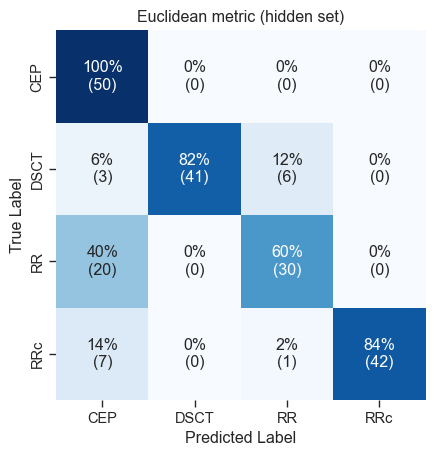

********** Run 2 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 78.67 %


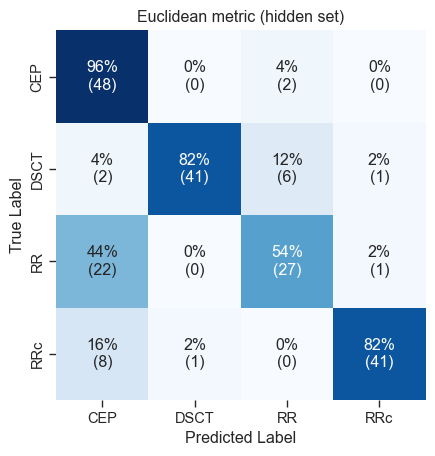

********** Run 3 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 80.33 %


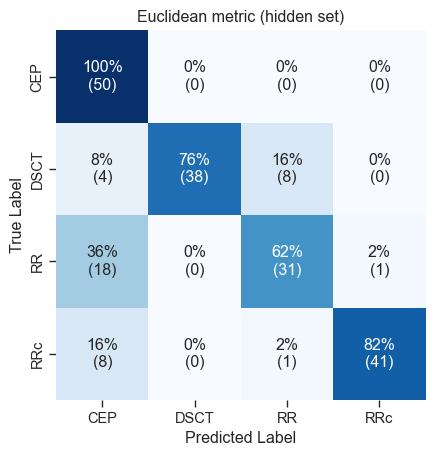

********** Run 4 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.01 %


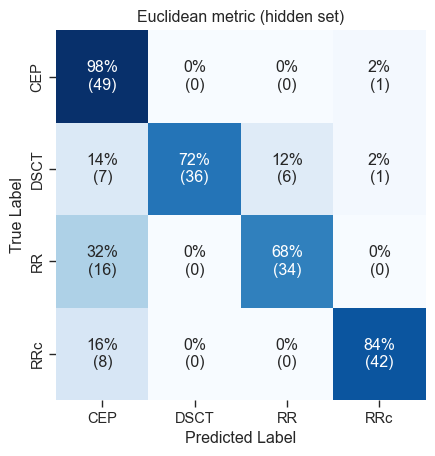

********** Run 5 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 79.00 %


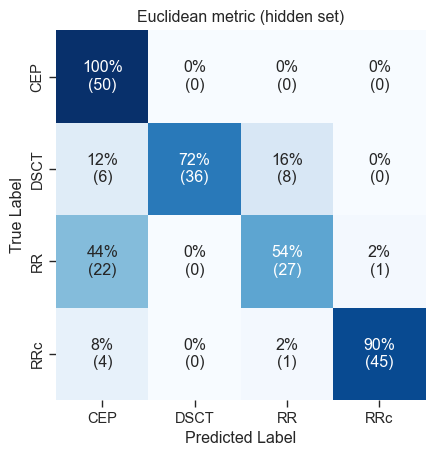

********** Run 6 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 80.79 %


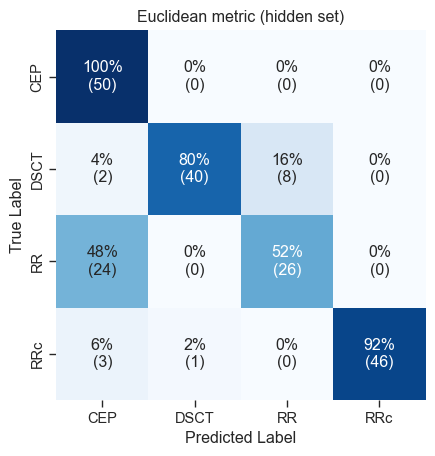

********** Run 7 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 78.46 %


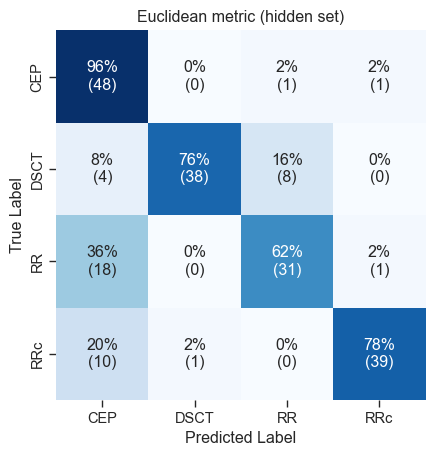

********** Run 8 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 78.91 %


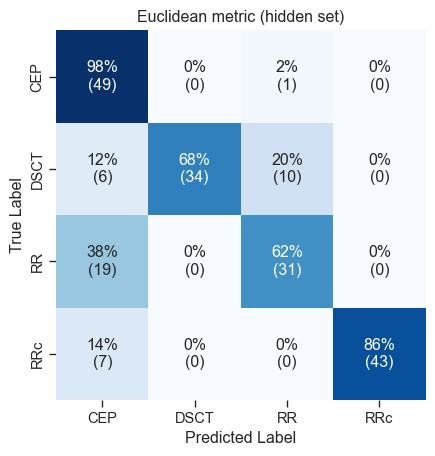

********** Run 9 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 76.53 %


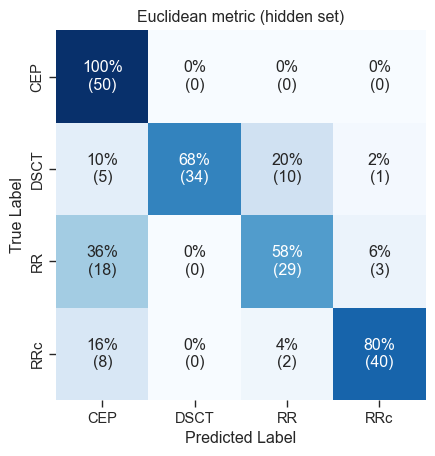

********** Run 10 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 77.27 %


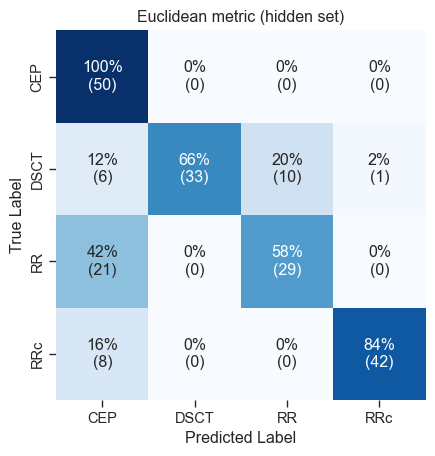

******************** Braycurtis ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 92.96 %


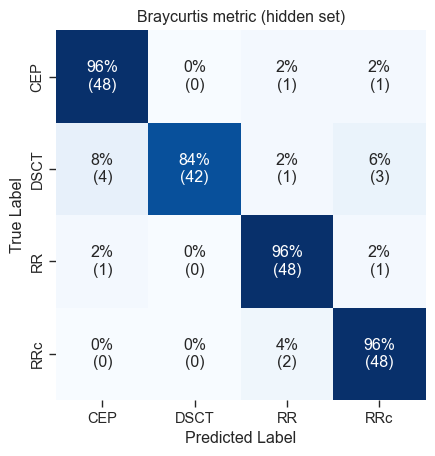

********** Run 2 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 90.50 %


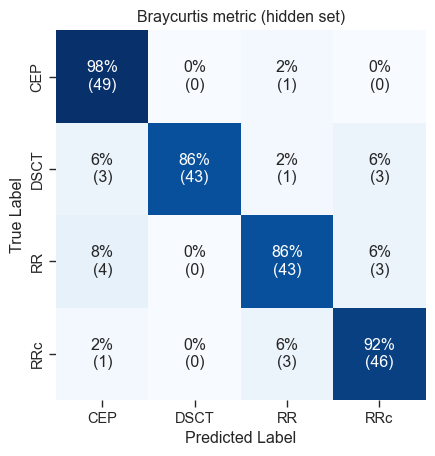

********** Run 3 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 87.94 %


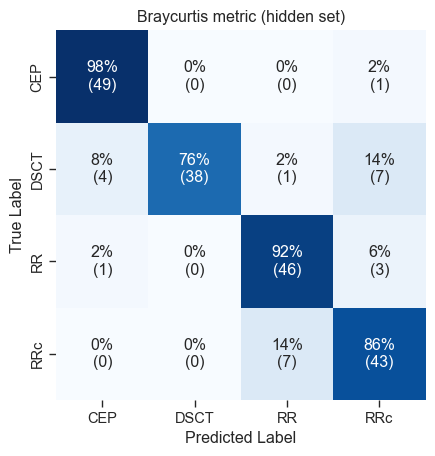

********** Run 4 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 90.07 %


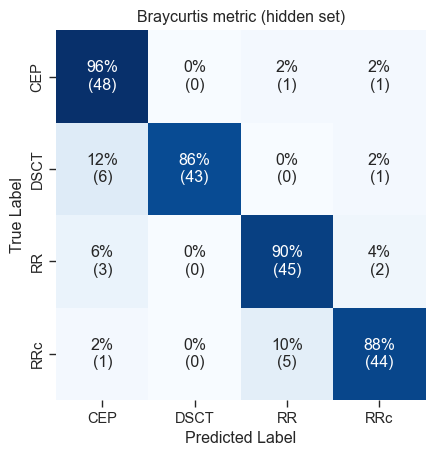

********** Run 5 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 86.95 %


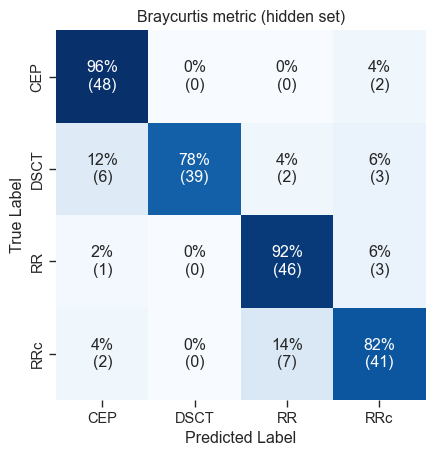

********** Run 6 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 84.54 %


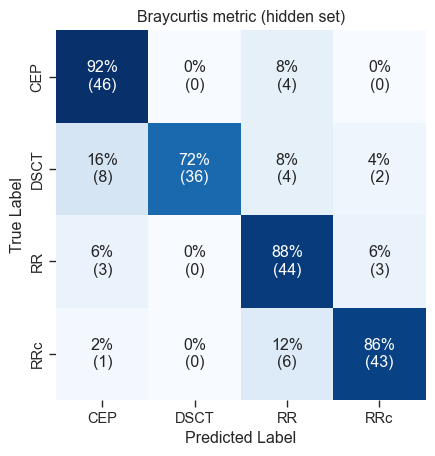

********** Run 7 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 90.13 %


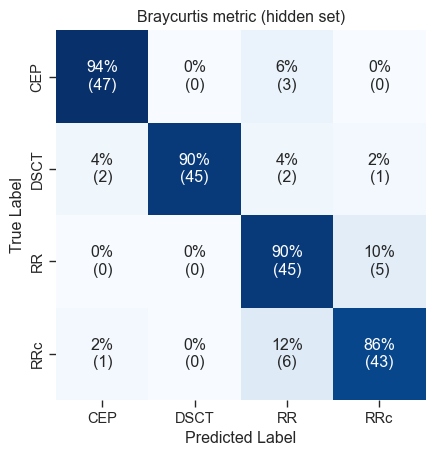

********** Run 8 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.08 %


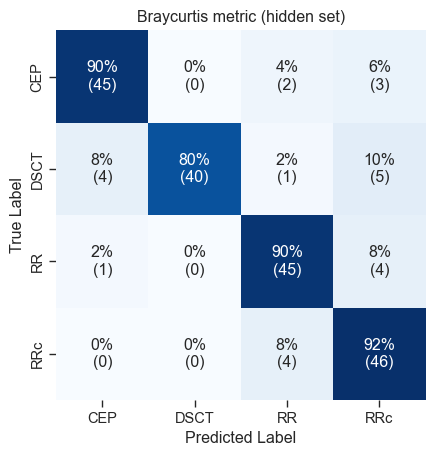

********** Run 9 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 89.54 %


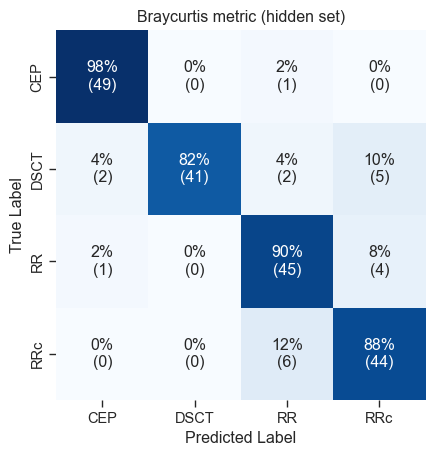

********** Run 10 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.37 %


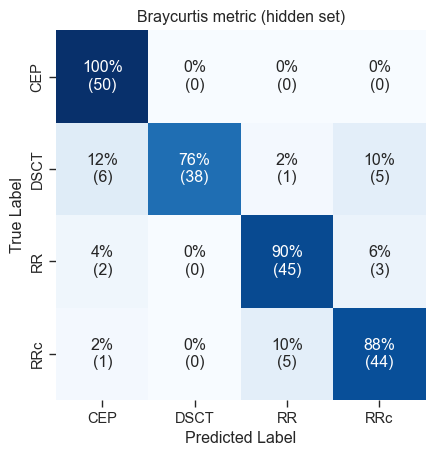

******************** Canberra ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 92.54 %


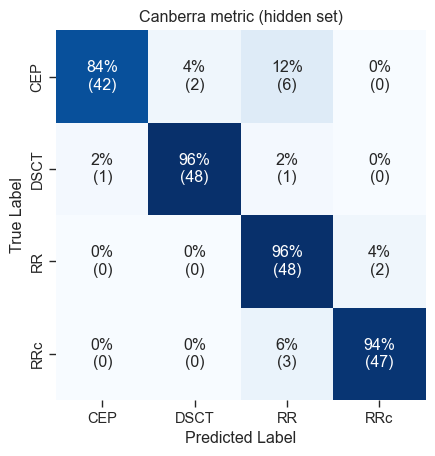

********** Run 2 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 95.03 %


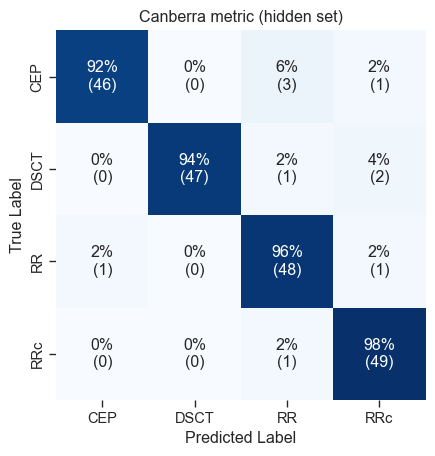

********** Run 3 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


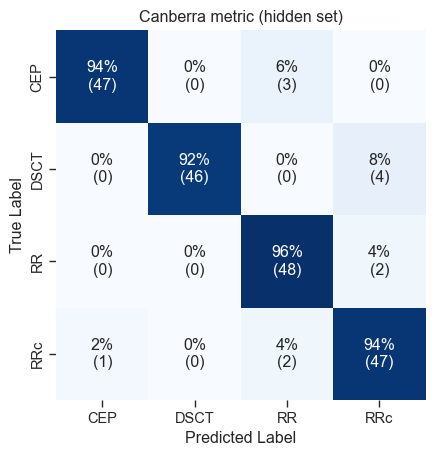

********** Run 4 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.47 %


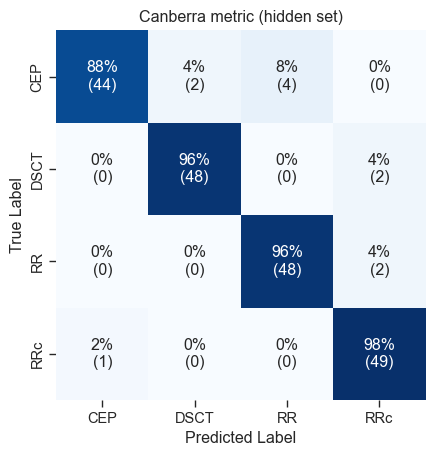

********** Run 5 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 93.06 %


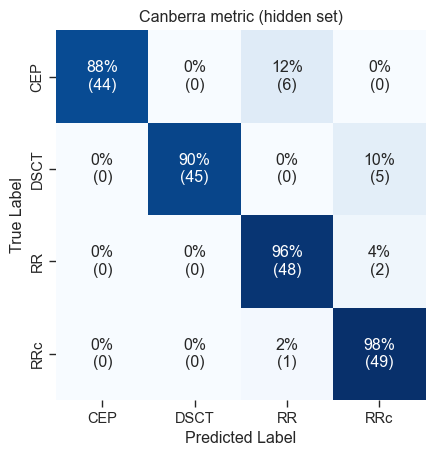

********** Run 6 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.06 %


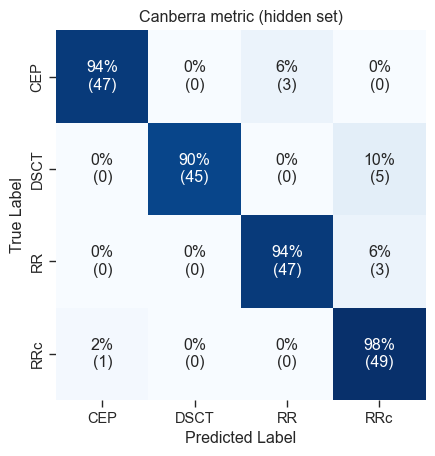

********** Run 7 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 92.55 %


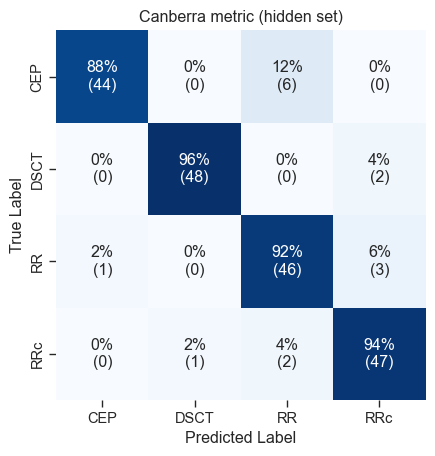

********** Run 8 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 93.56 %


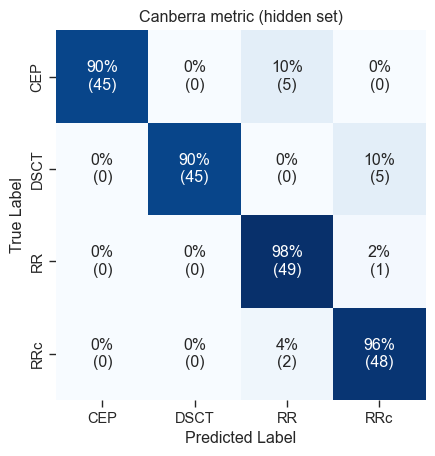

********** Run 9 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 93.04 %


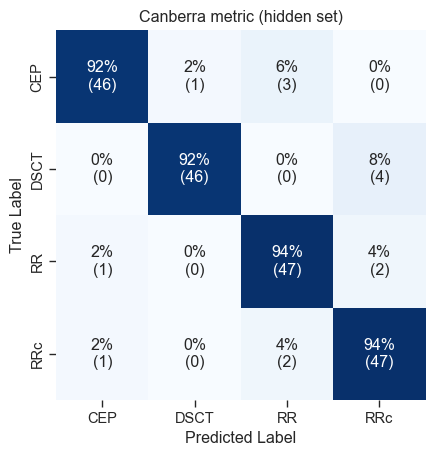

********** Run 10 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 95.02 %


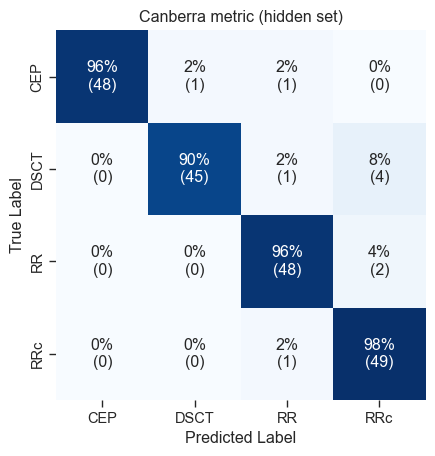

******************** Cityblock ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 84.04 %


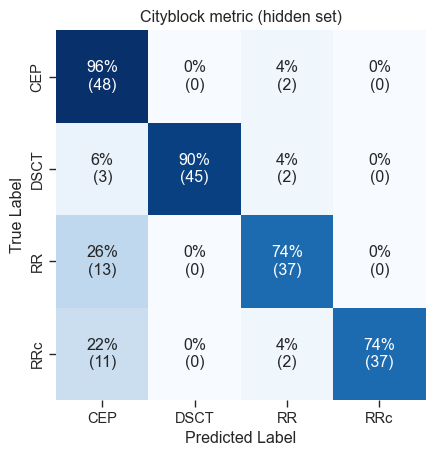

********** Run 2 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 90.22 %


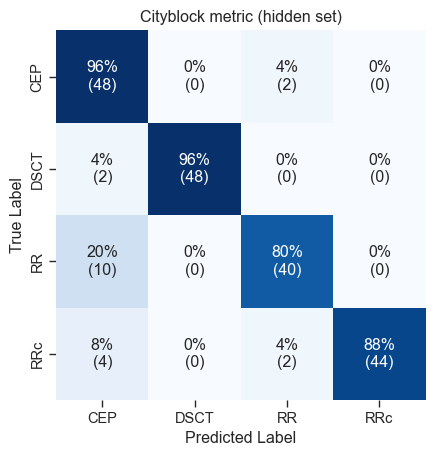

********** Run 3 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 82.20 %


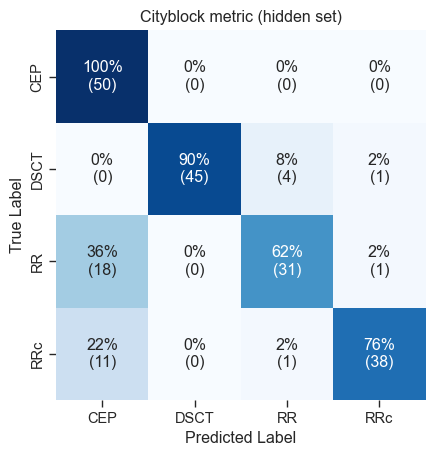

********** Run 4 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 86.32 %


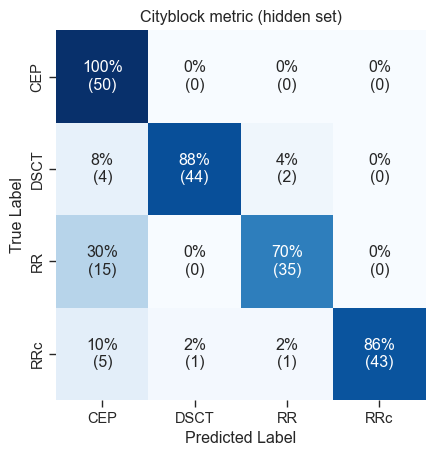

********** Run 5 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 85.91 %


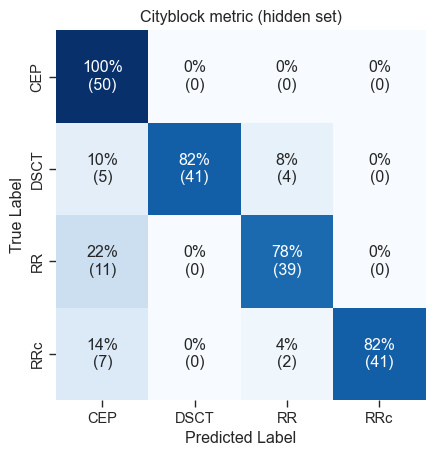

********** Run 6 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 85.94 %


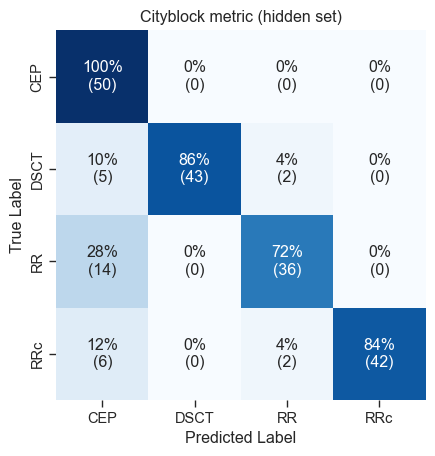

********** Run 7 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 87.31 %


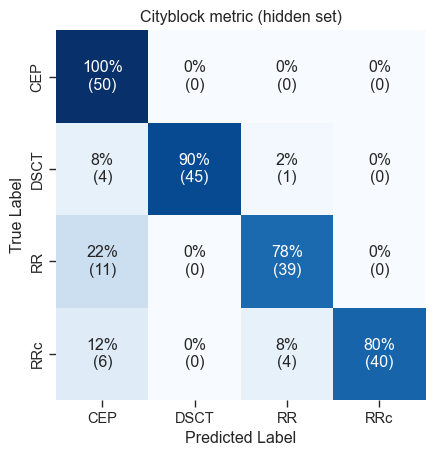

********** Run 8 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 86.84 %


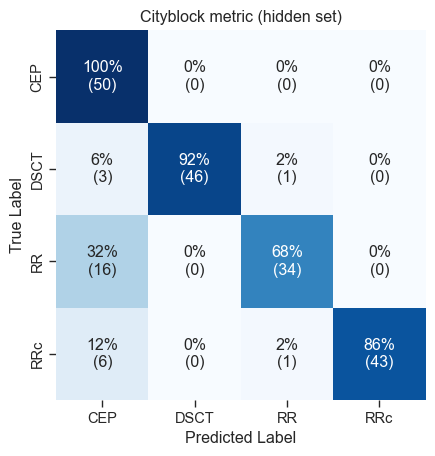

********** Run 9 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 83.53 %


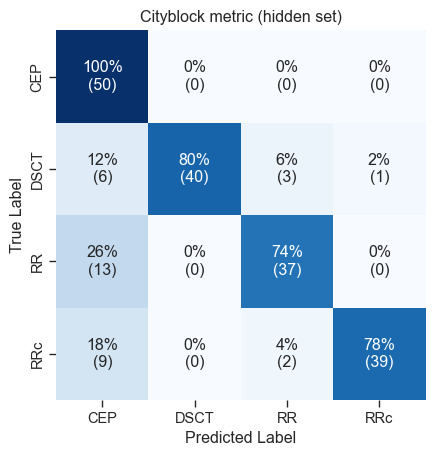

********** Run 10 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 85.81 %


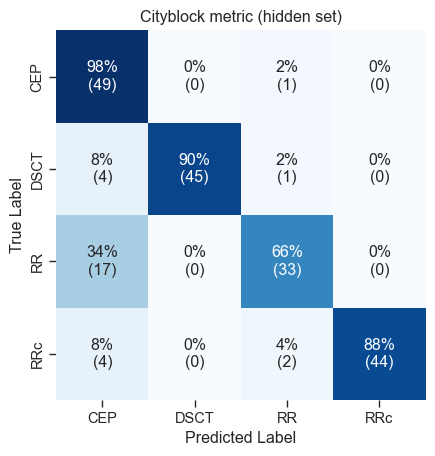

******************** Chebyshev ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.58 %


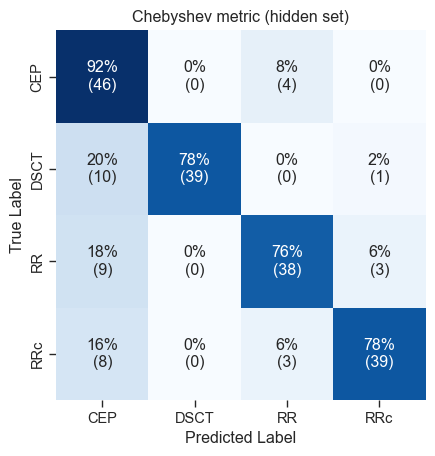

********** Run 2 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 80.00 %


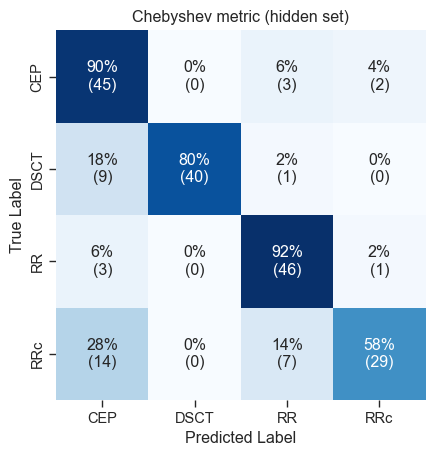

********** Run 3 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 79.26 %


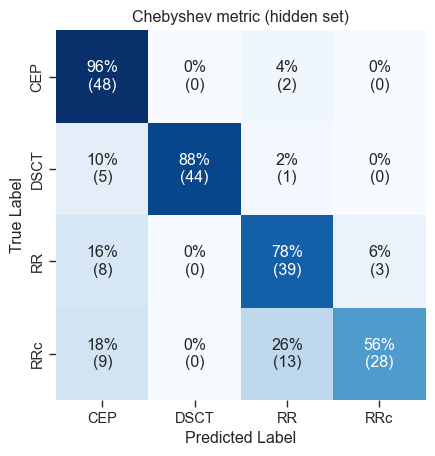

********** Run 4 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 76.83 %


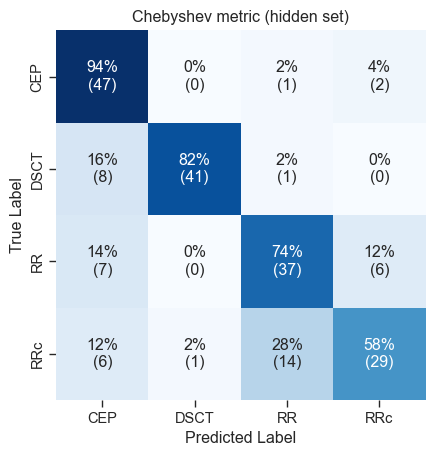

********** Run 5 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 73.78 %


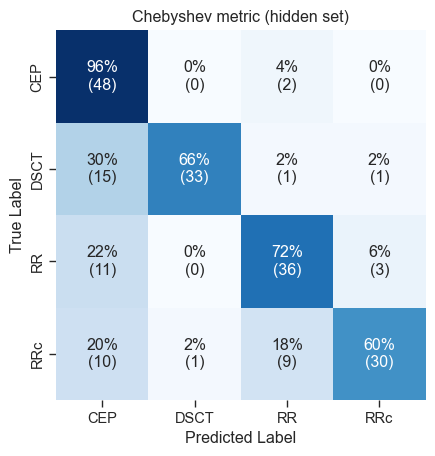

********** Run 6 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 76.94 %


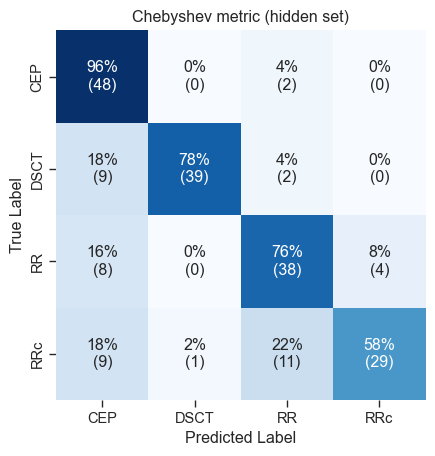

********** Run 7 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 80.82 %


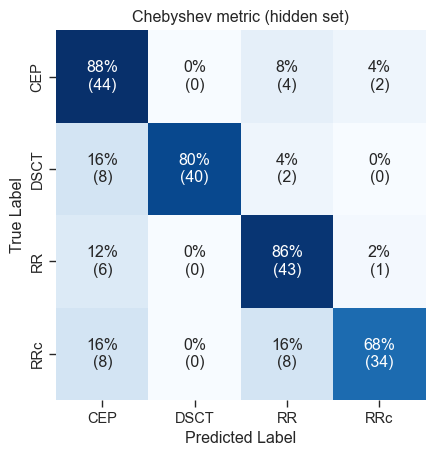

********** Run 8 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 82.03 %


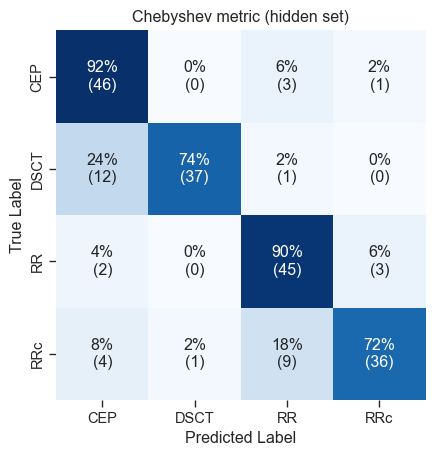

********** Run 9 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 78.00 %


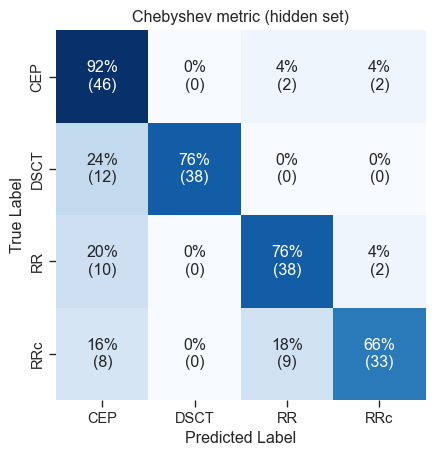

********** Run 10 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 74.34 %


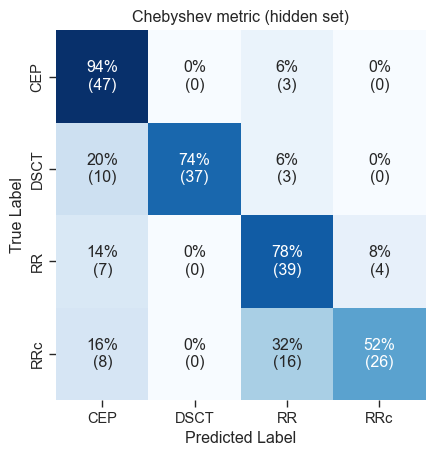

******************** Clark ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.00 %


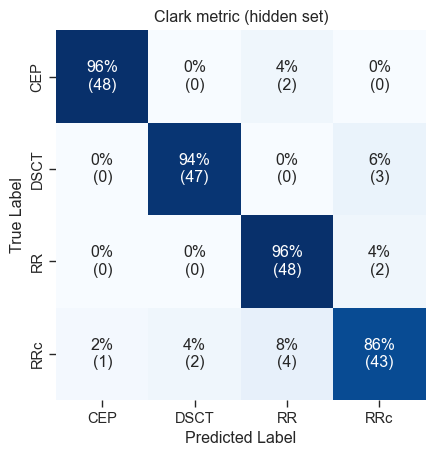

********** Run 2 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 91.60 %


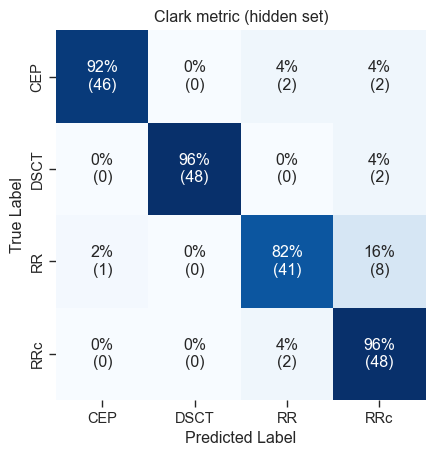

********** Run 3 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.60 %


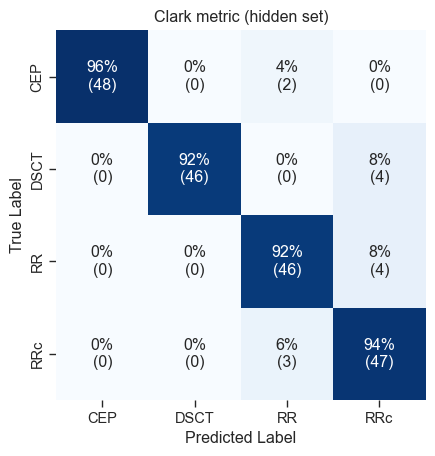

********** Run 4 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 94.02 %


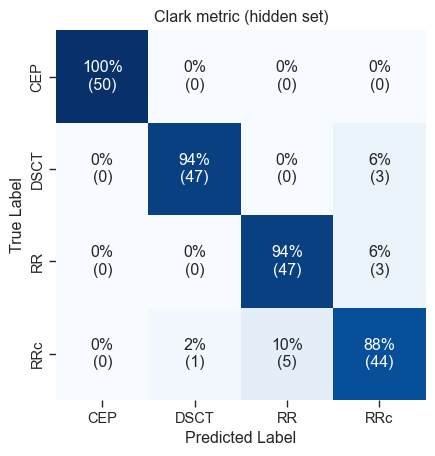

********** Run 5 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.57 %


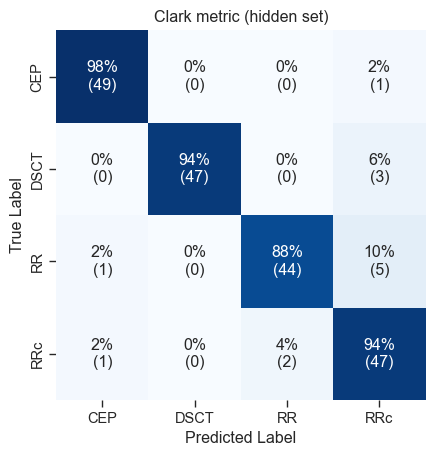

********** Run 6 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 94.04 %


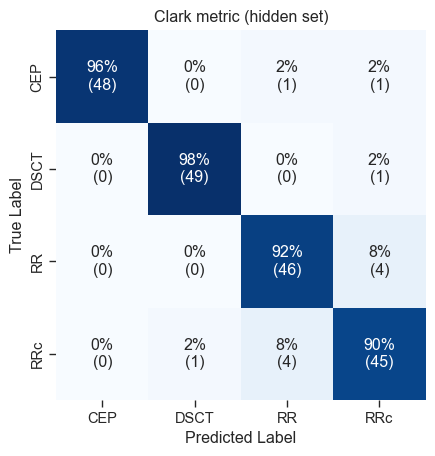

********** Run 7 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 92.51 %


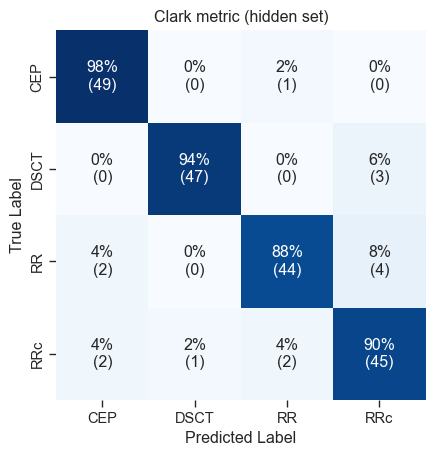

********** Run 8 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.13 %


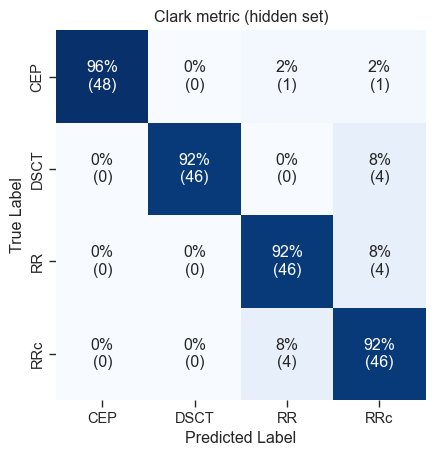

********** Run 9 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 92.52 %


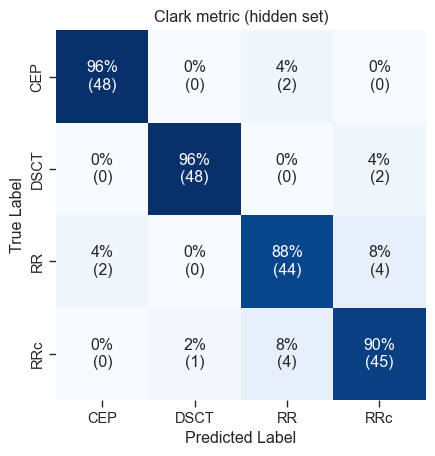

********** Run 10 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 91.53 %


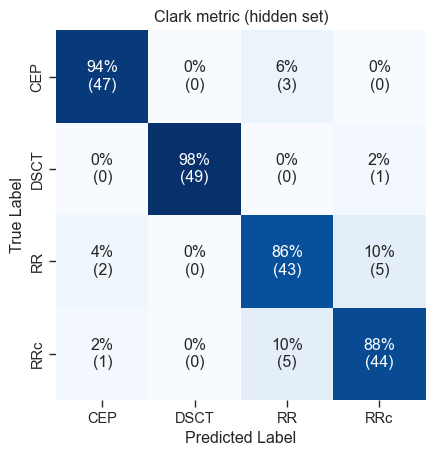

******************** Correlation ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.68 %


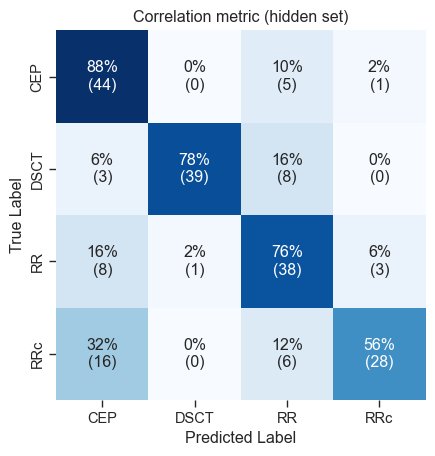

********** Run 2 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 75.55 %


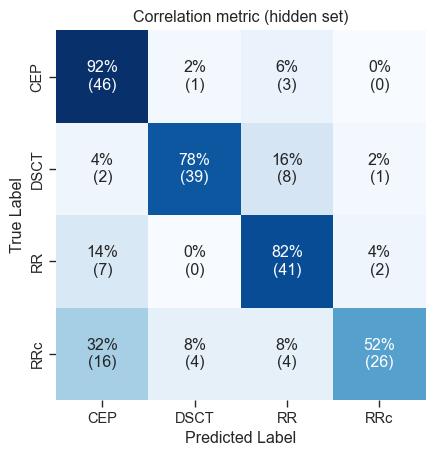

********** Run 3 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 76.13 %


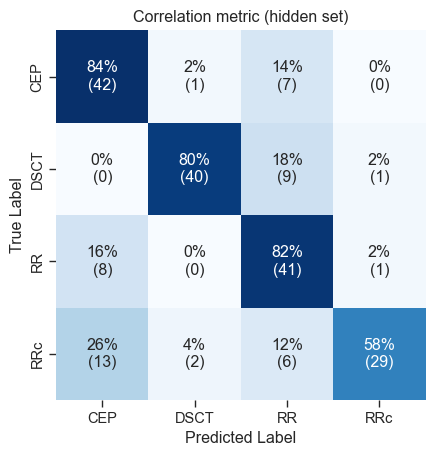

********** Run 4 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.15 %


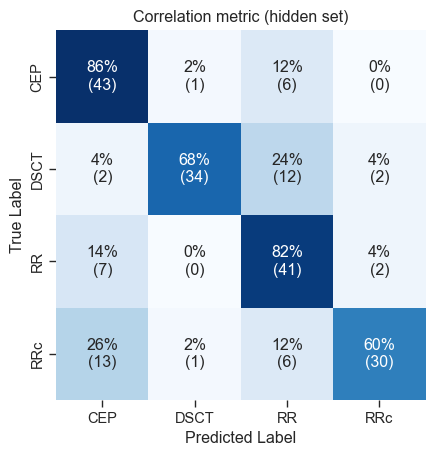

********** Run 5 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 68.51 %


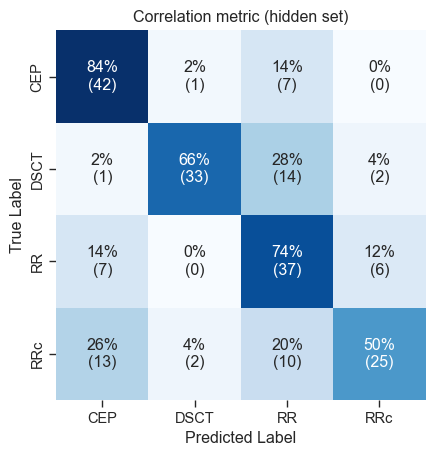

********** Run 6 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 72.35 %


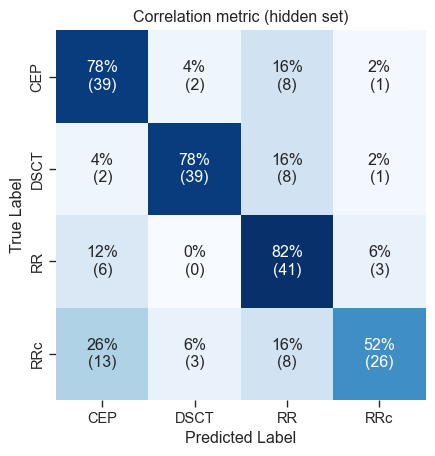

********** Run 7 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 73.53 %


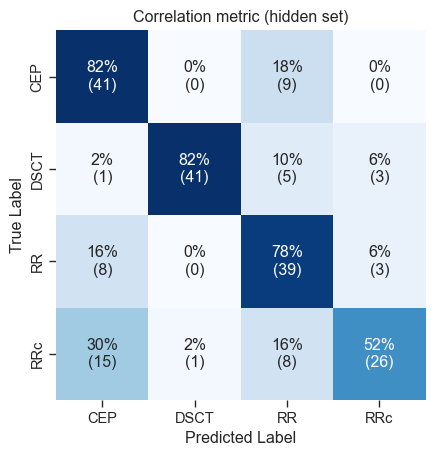

********** Run 8 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 76.40 %


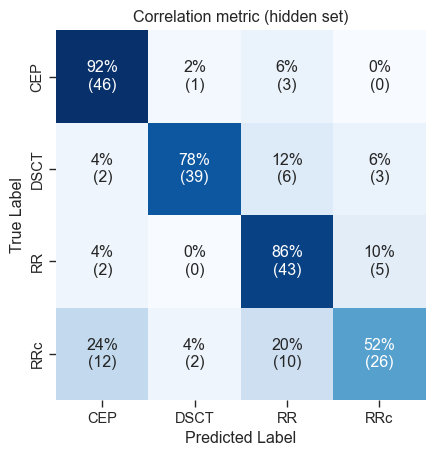

********** Run 9 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 69.69 %


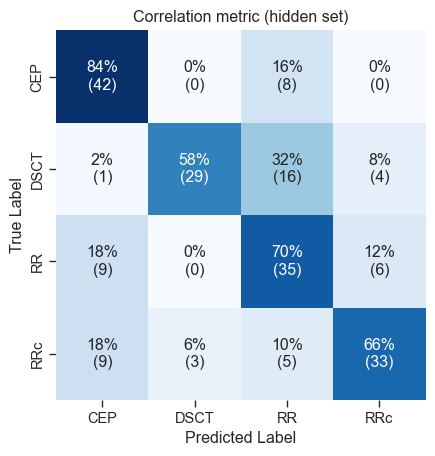

********** Run 10 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 70.33 %


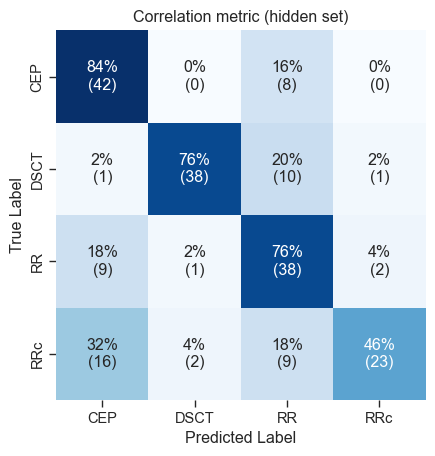

******************** Cosine ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 76.81 %


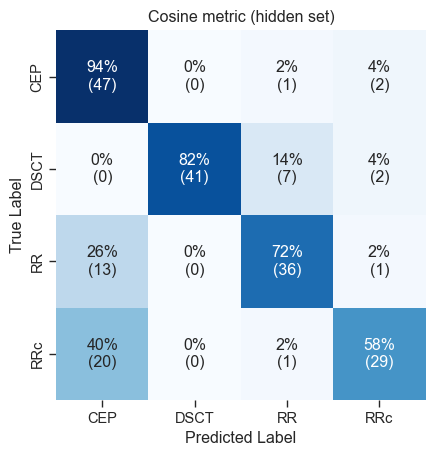

********** Run 2 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.97 %


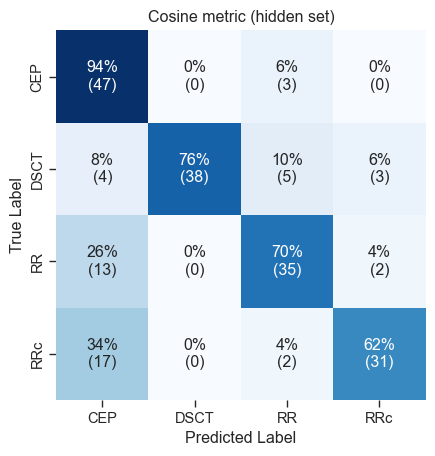

********** Run 3 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 77.33 %


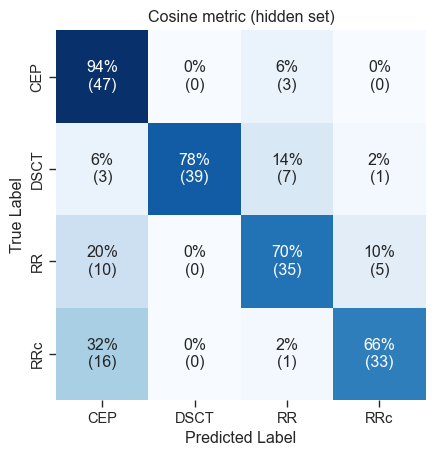

********** Run 4 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.24 %


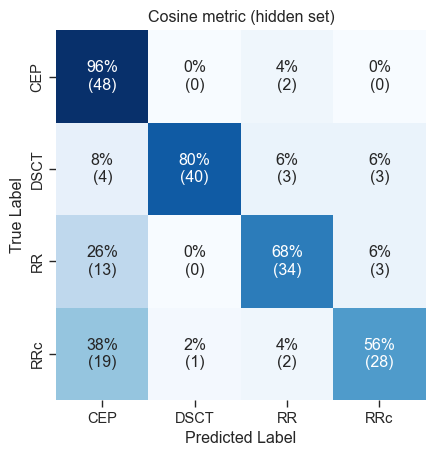

********** Run 5 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 79.37 %


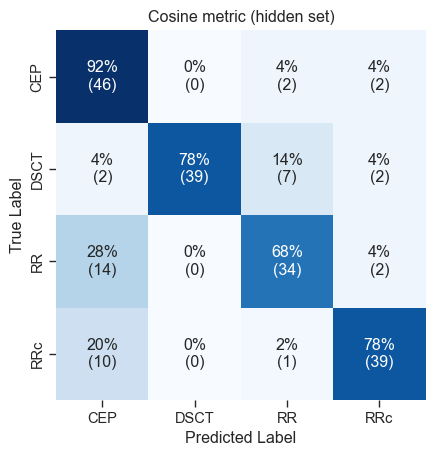

********** Run 6 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.10 %


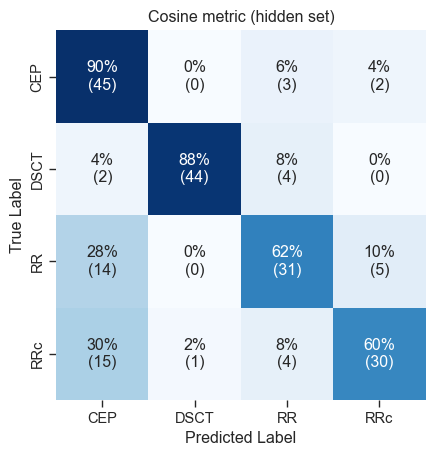

********** Run 7 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 74.57 %


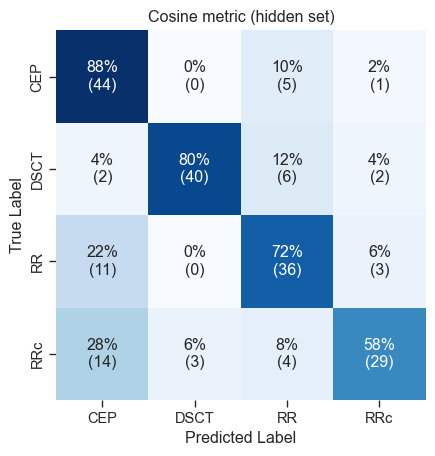

********** Run 8 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 77.53 %


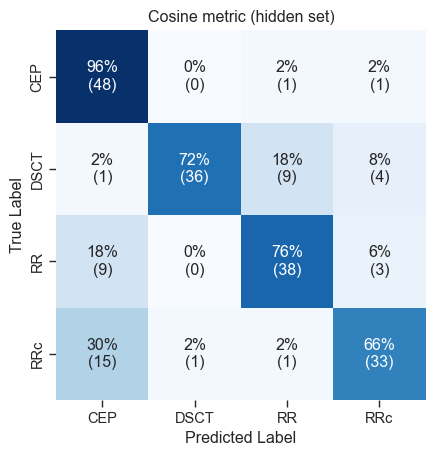

********** Run 9 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 78.35 %


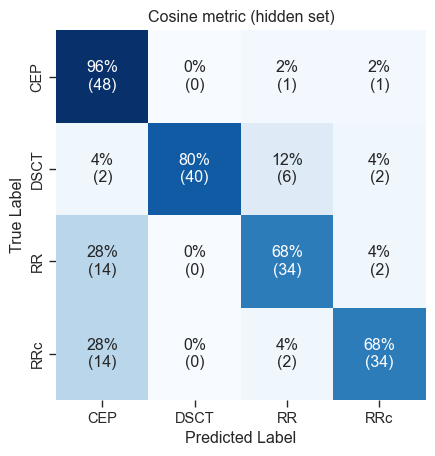

********** Run 10 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 76.68 %


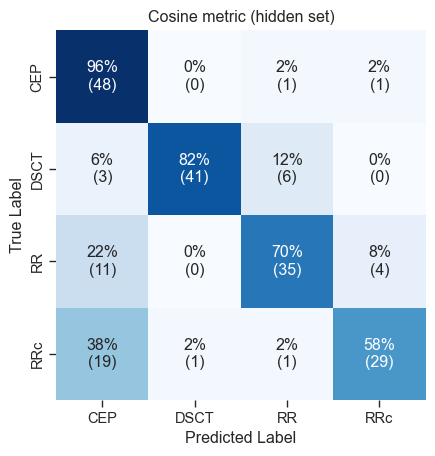

******************** Hellinger ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 94.54 %


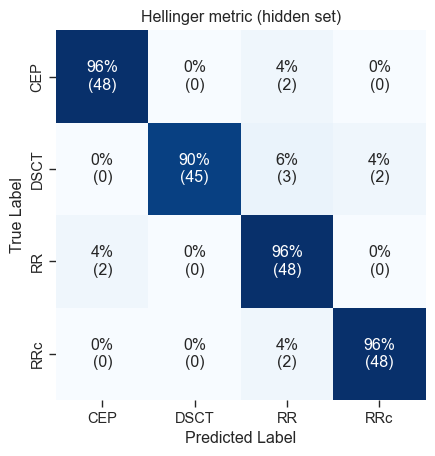

********** Run 2 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 94.60 %


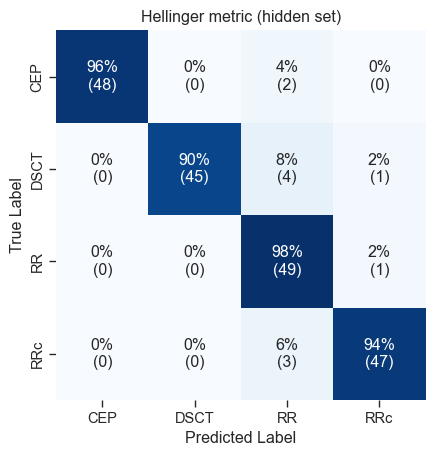

********** Run 3 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 91.49 %


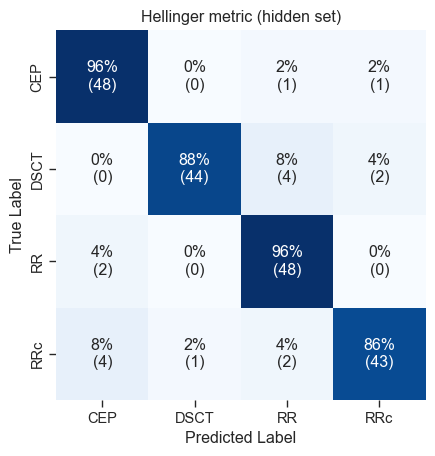

********** Run 4 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.05 %


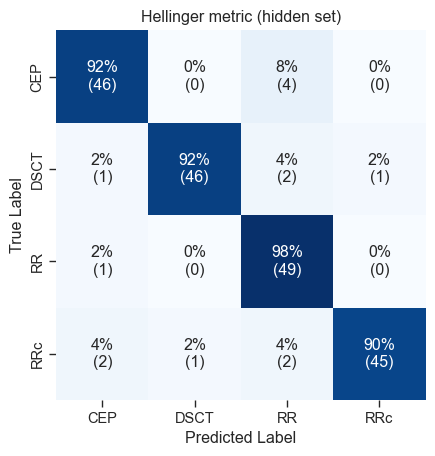

********** Run 5 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 95.00 %


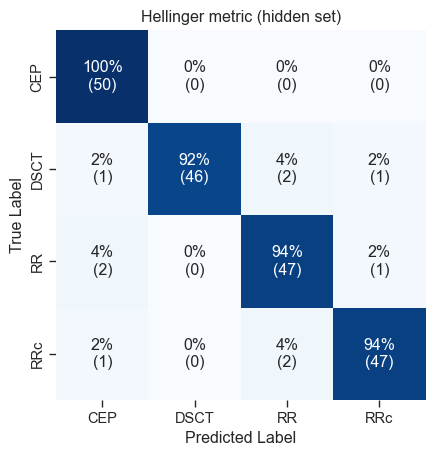

********** Run 6 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 94.99 %


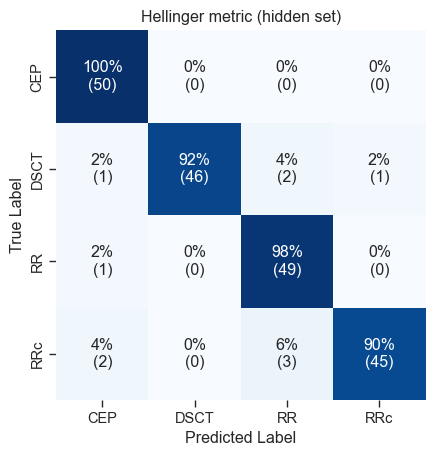

********** Run 7 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 92.52 %


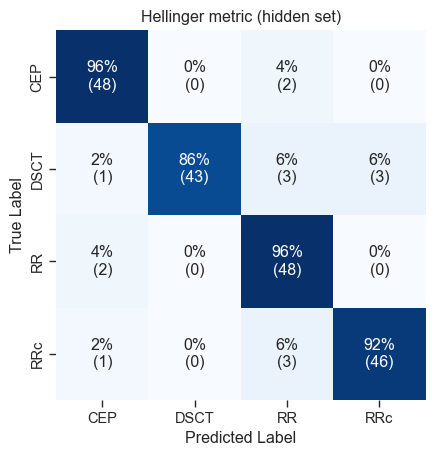

********** Run 8 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 90.99 %


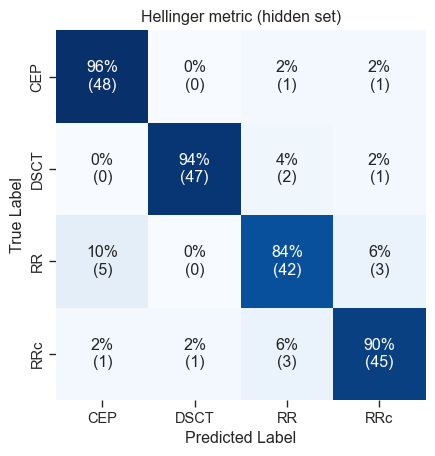

********** Run 9 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 94.53 %


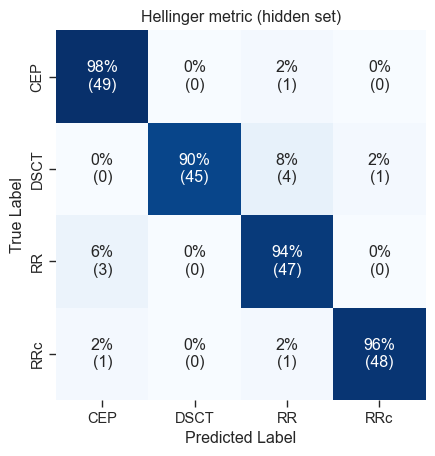

********** Run 10 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 91.07 %


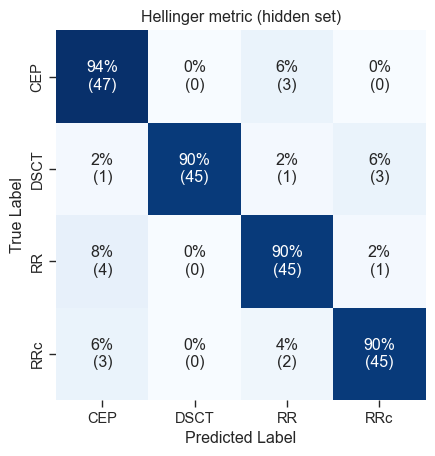

******************** Jaccard ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 97.01 %


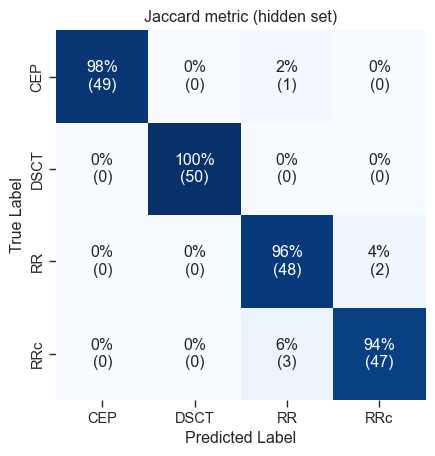

********** Run 2 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.52 %


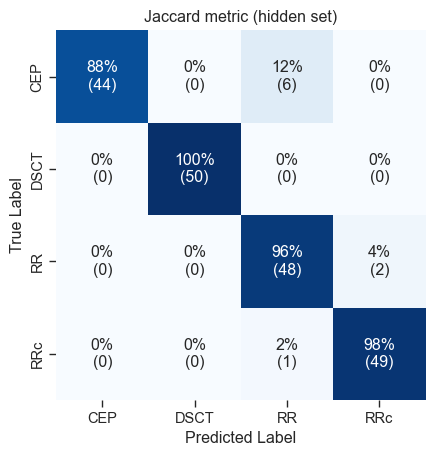

********** Run 3 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 97.00 %


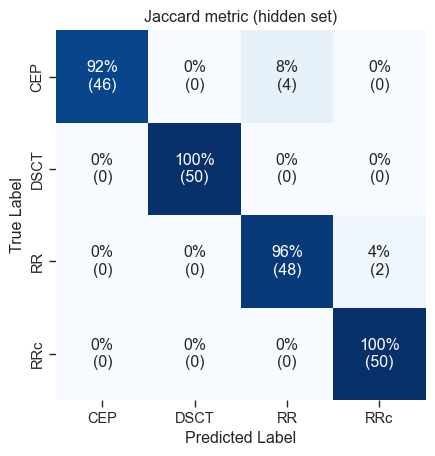

********** Run 4 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 96.01 %


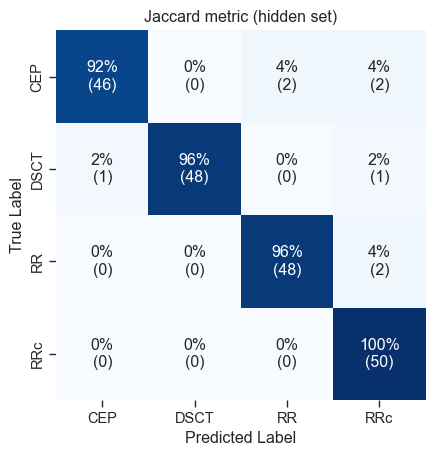

********** Run 5 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 97.00 %


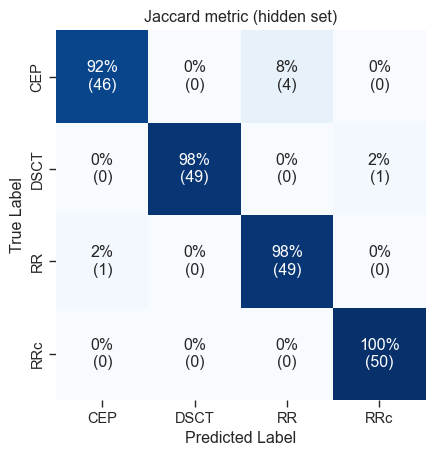

********** Run 6 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 96.04 %


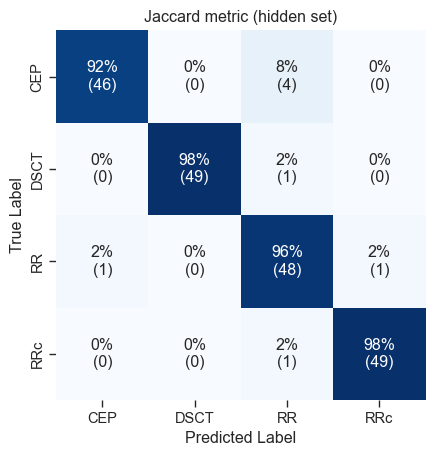

********** Run 7 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 94.54 %


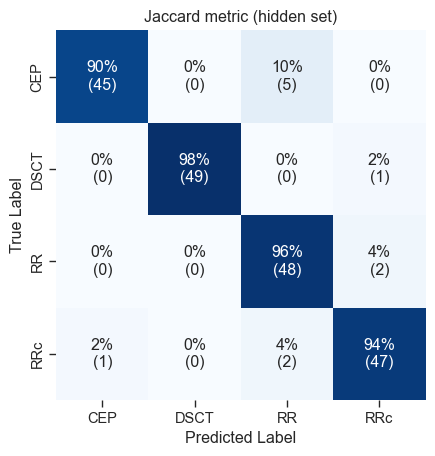

********** Run 8 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 96.49 %


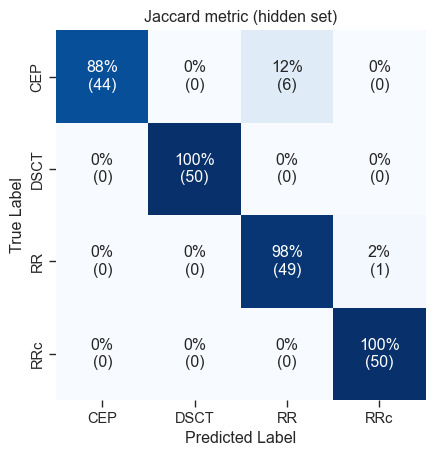

********** Run 9 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 96.04 %


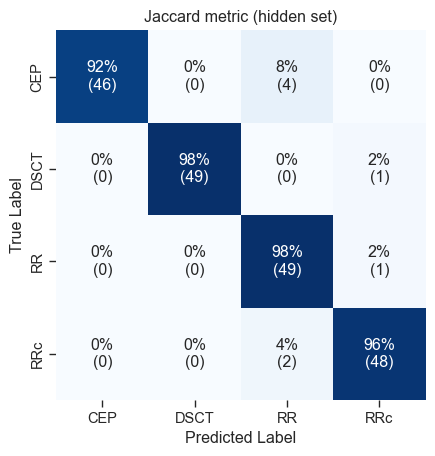

********** Run 10 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 96.52 %


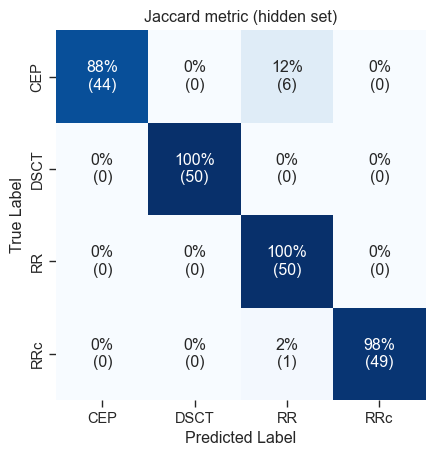

******************** Lorentzian ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 90.11 %


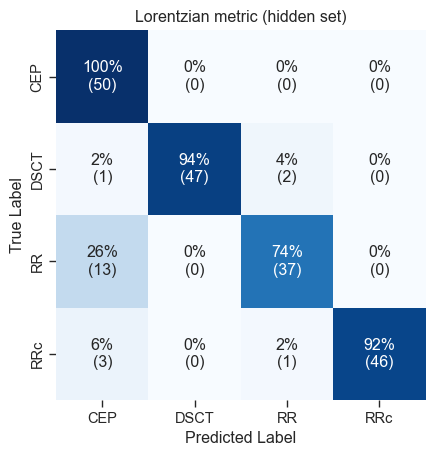

********** Run 2 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 86.15 %


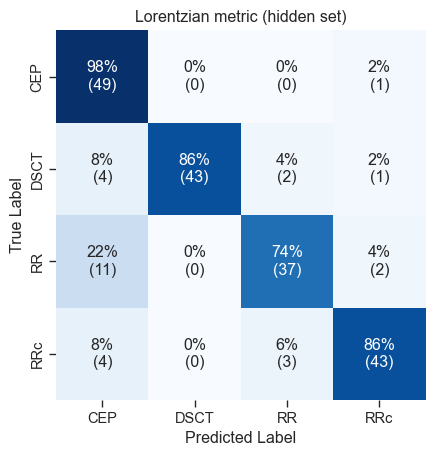

********** Run 3 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 85.93 %


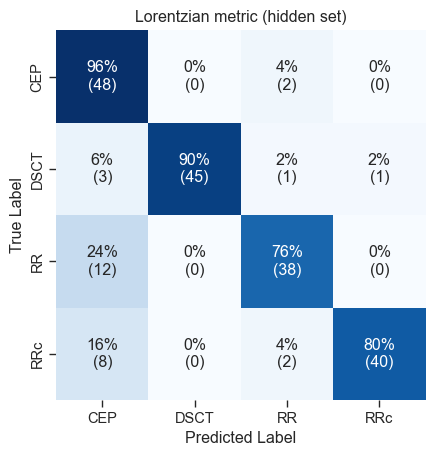

********** Run 4 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.29 %


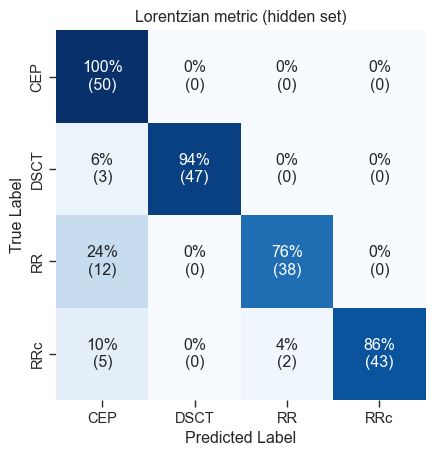

********** Run 5 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 86.29 %


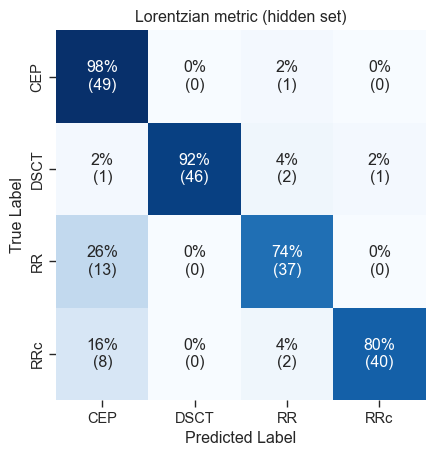

********** Run 6 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 88.73 %


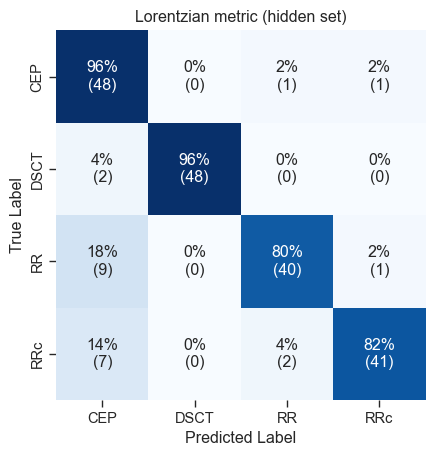

********** Run 7 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 81.41 %


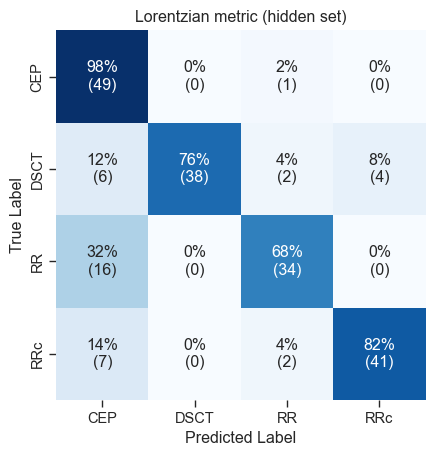

********** Run 8 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 84.31 %


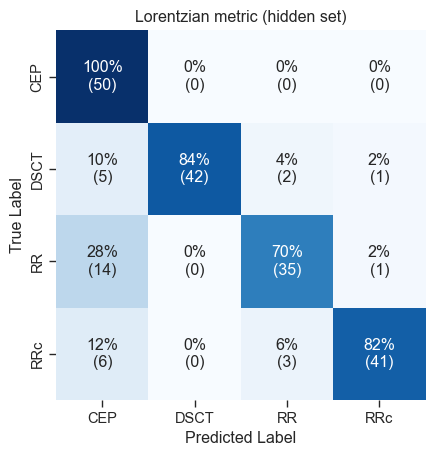

********** Run 9 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 83.56 %


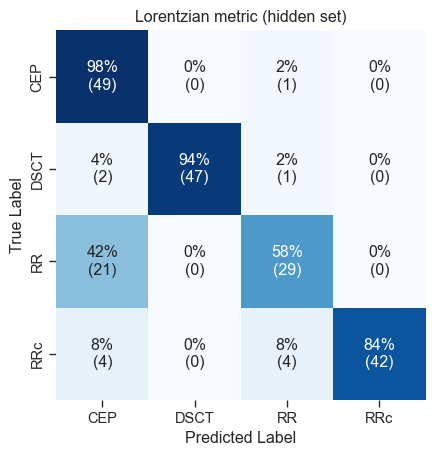

********** Run 10 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 84.85 %


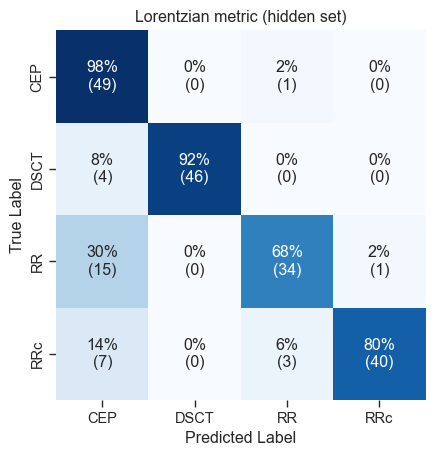

******************** Marylandbridge ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.61 %


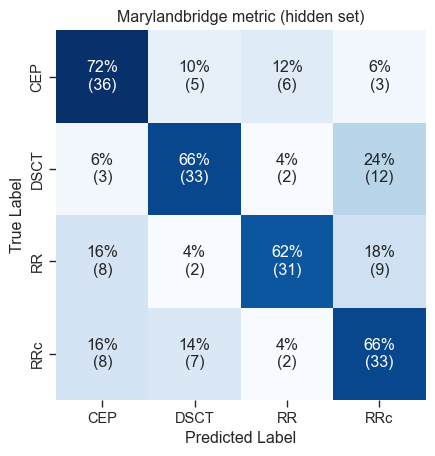

********** Run 2 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 65.05 %


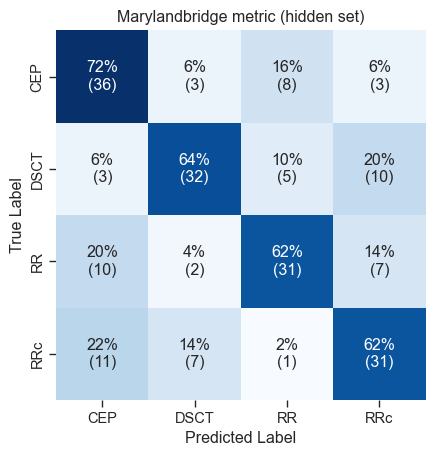

********** Run 3 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 60.99 %


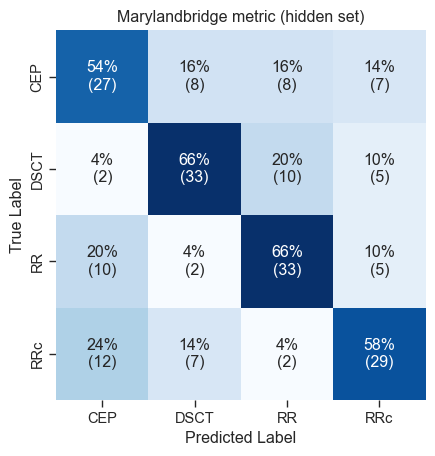

********** Run 4 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 59.16 %


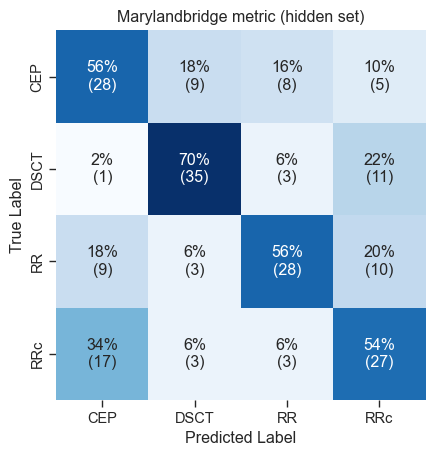

********** Run 5 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 62.73 %


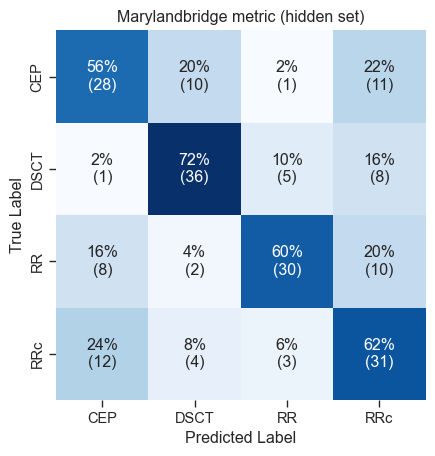

********** Run 6 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 63.88 %


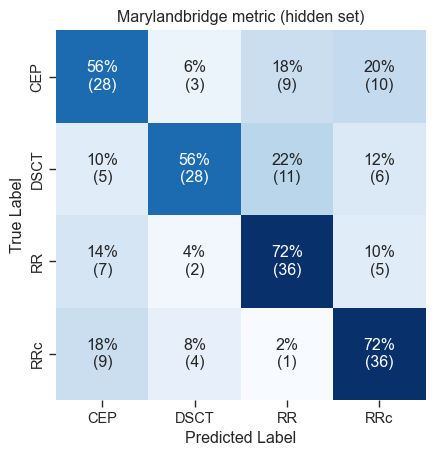

********** Run 7 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 65.52 %


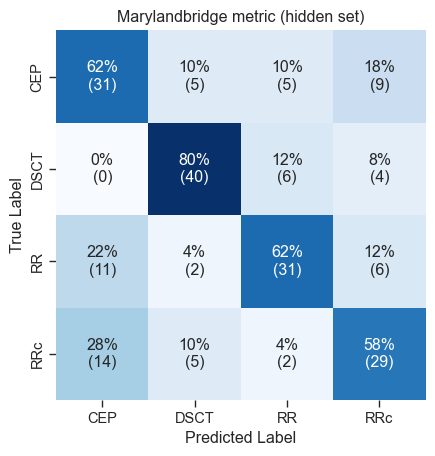

********** Run 8 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 62.96 %


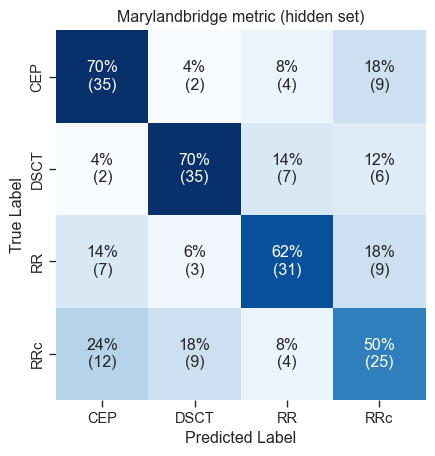

********** Run 9 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 67.96 %


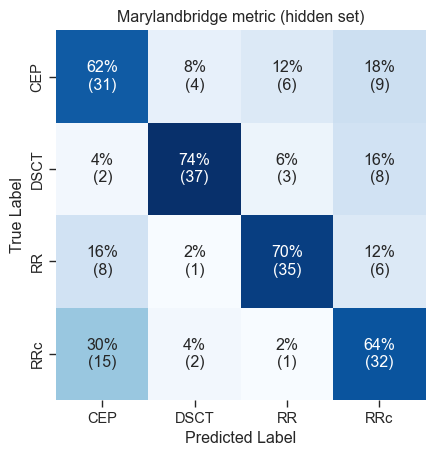

********** Run 10 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.48 %


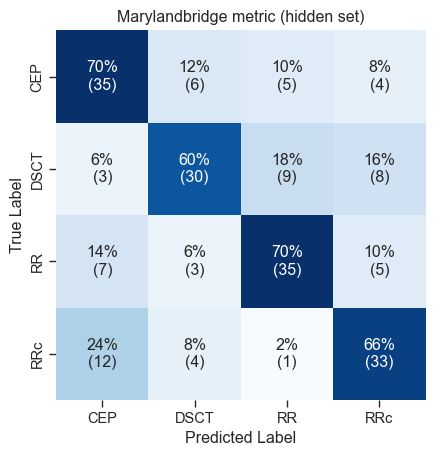

******************** Meehl ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 71.21 %


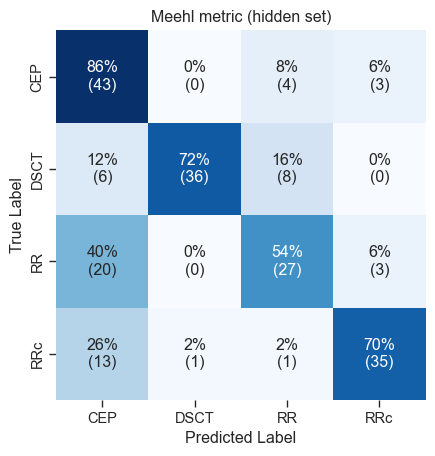

********** Run 2 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.96 %


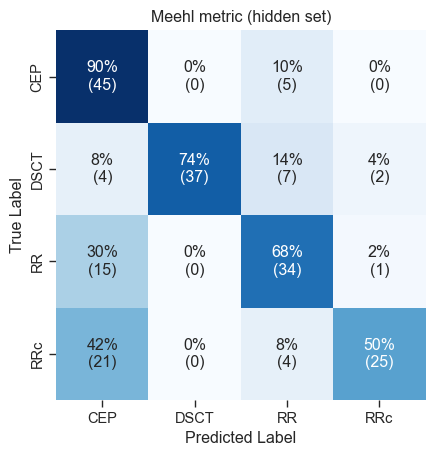

********** Run 3 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 69.80 %


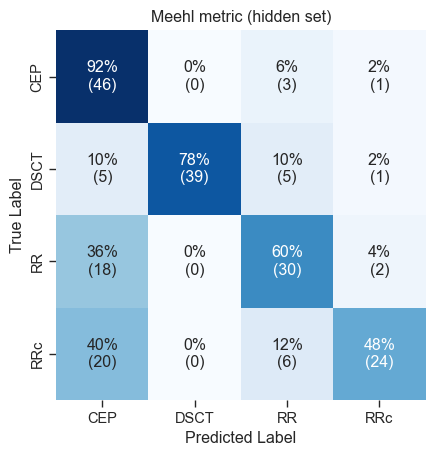

********** Run 4 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 73.02 %


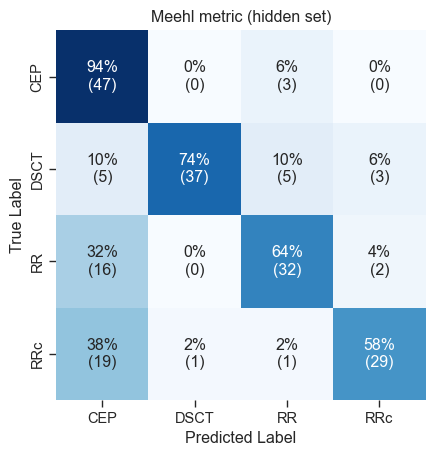

********** Run 5 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 76.50 %


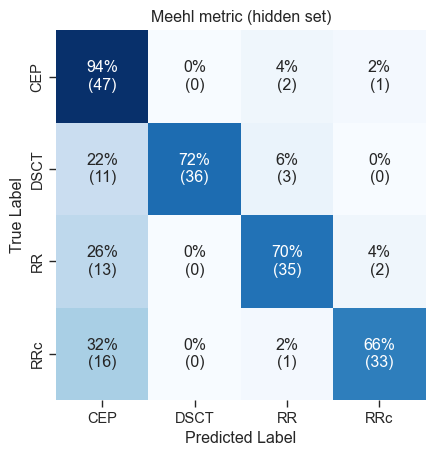

********** Run 6 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 74.11 %


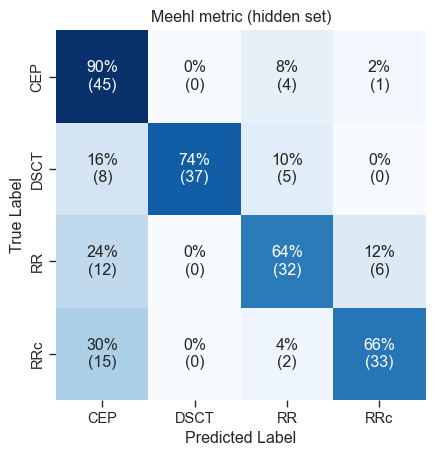

********** Run 7 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 73.24 %


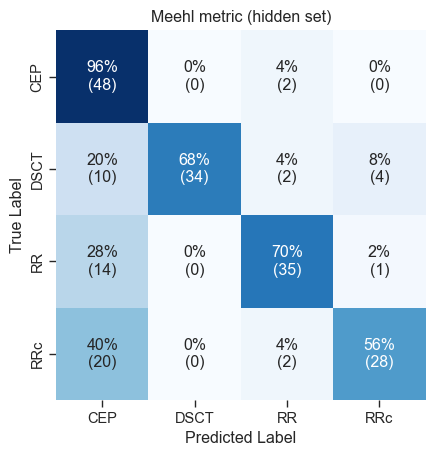

********** Run 8 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 67.66 %


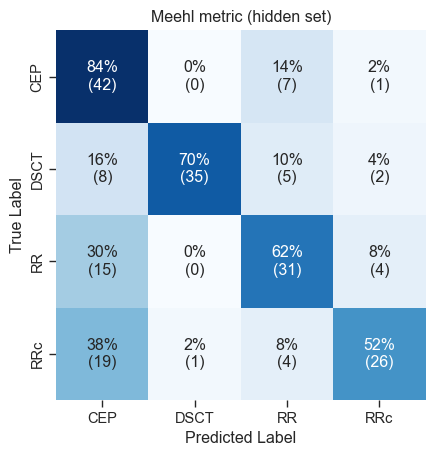

********** Run 9 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 73.55 %


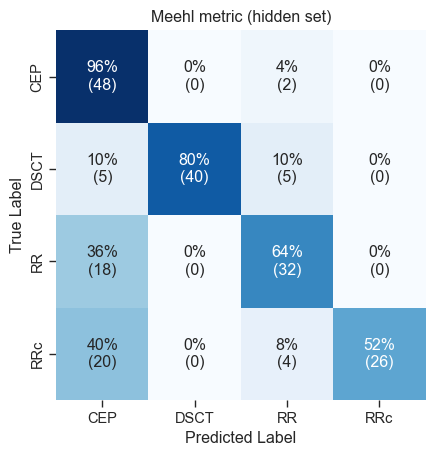

********** Run 10 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 72.85 %


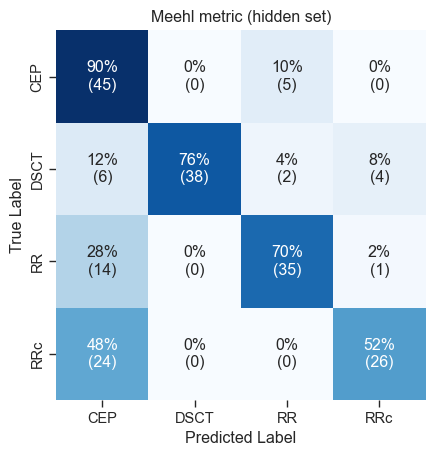

******************** Motyka ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 90.52 %


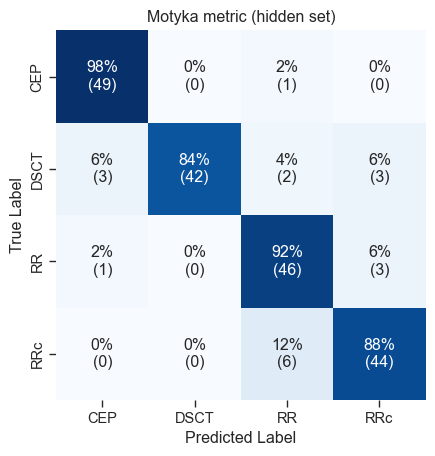

********** Run 2 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.46 %


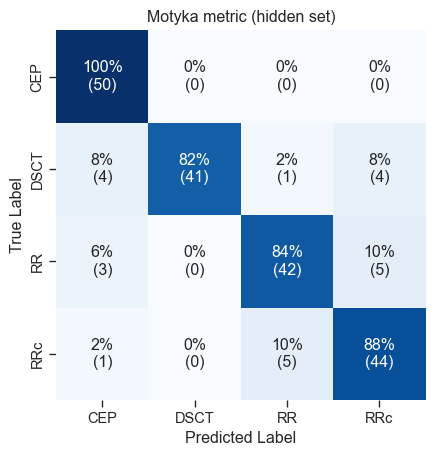

********** Run 3 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 87.53 %


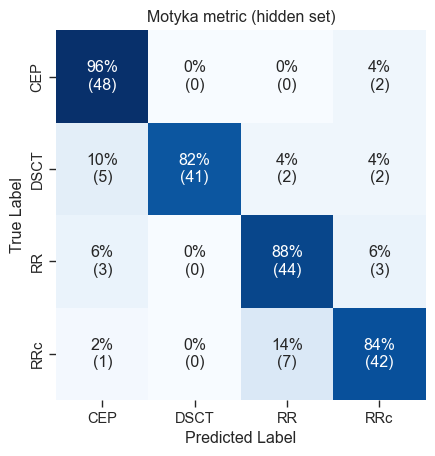

********** Run 4 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 86.93 %


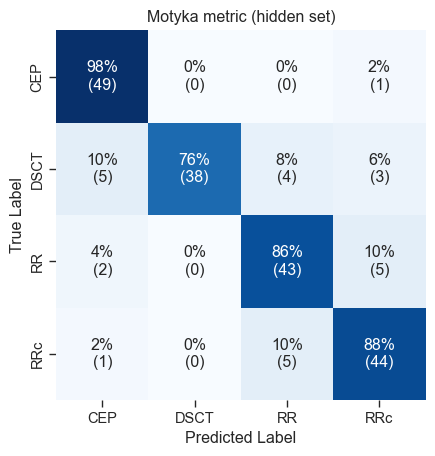

********** Run 5 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 90.95 %


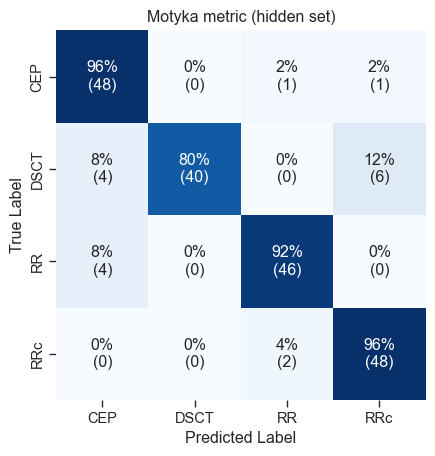

********** Run 6 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 89.53 %


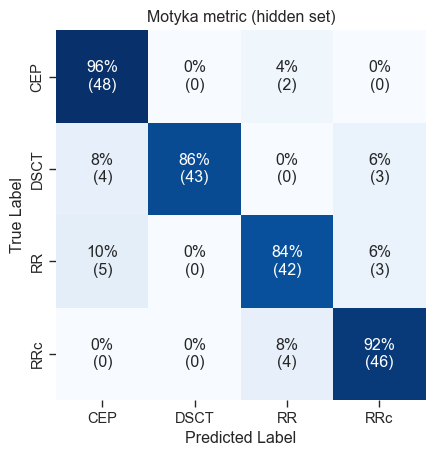

********** Run 7 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 93.49 %


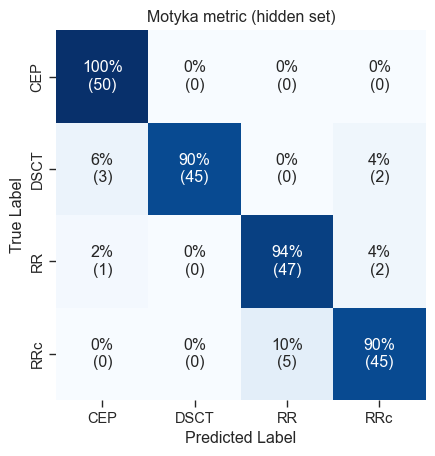

********** Run 8 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 85.57 %


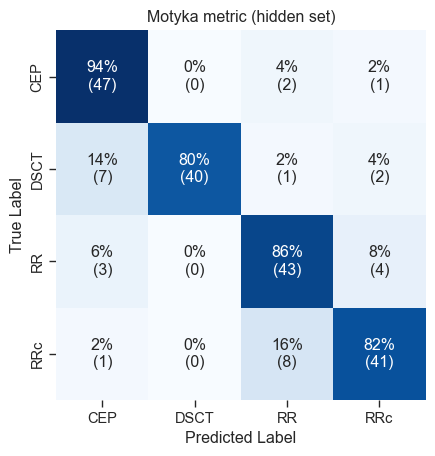

********** Run 9 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.92 %


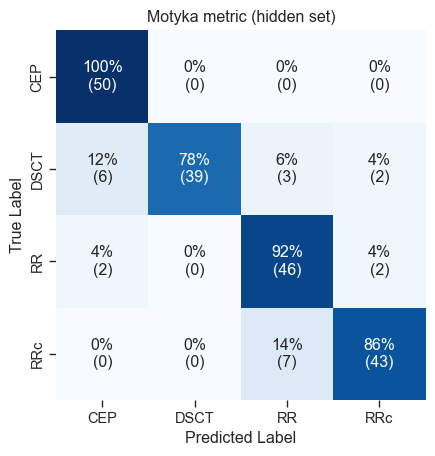

********** Run 10 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 86.46 %


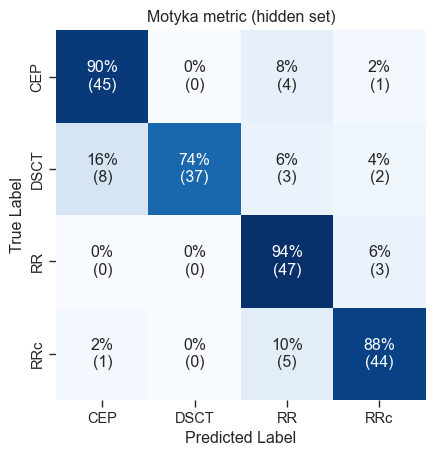

******************** Soergel ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 90.05 %


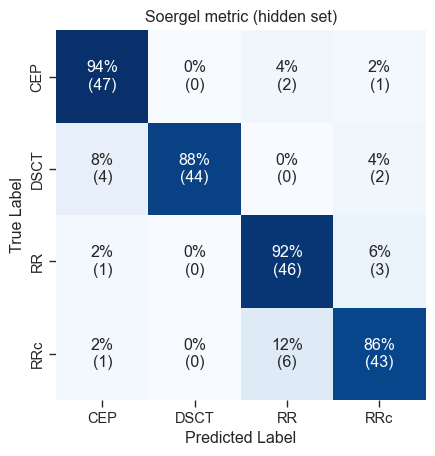

********** Run 2 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 92.48 %


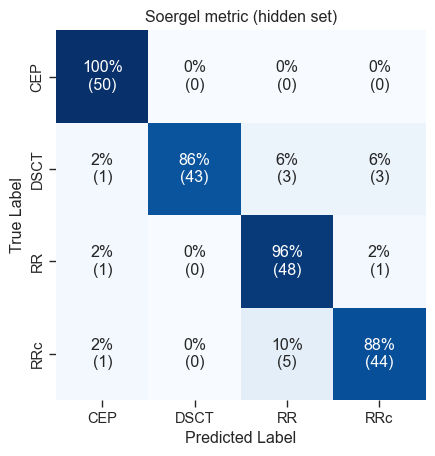

********** Run 3 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 89.99 %


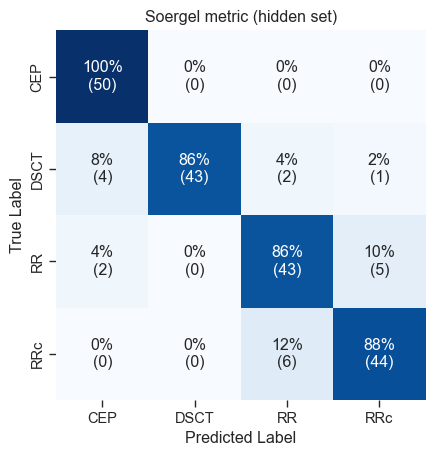

********** Run 4 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.00 %


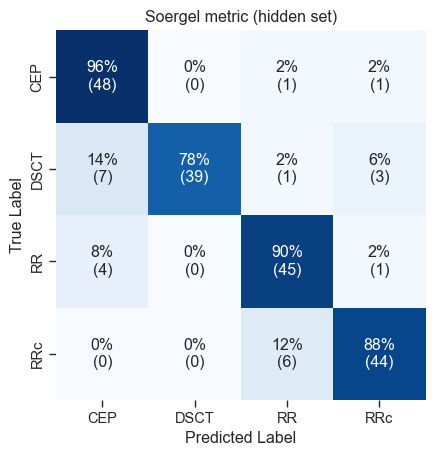

********** Run 5 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 85.51 %


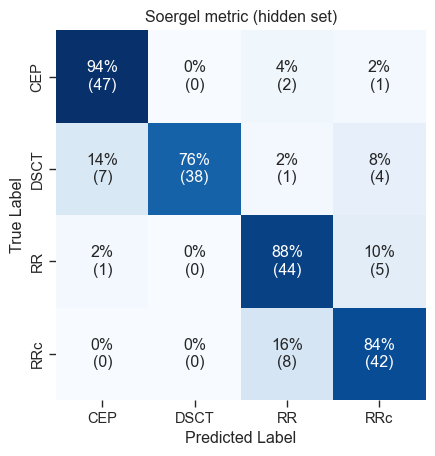

********** Run 6 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 90.44 %


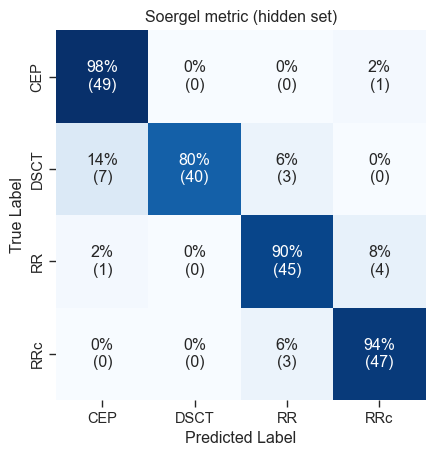

********** Run 7 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 84.96 %


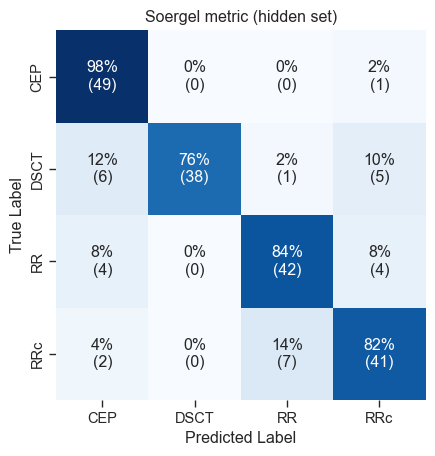

********** Run 8 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.95 %


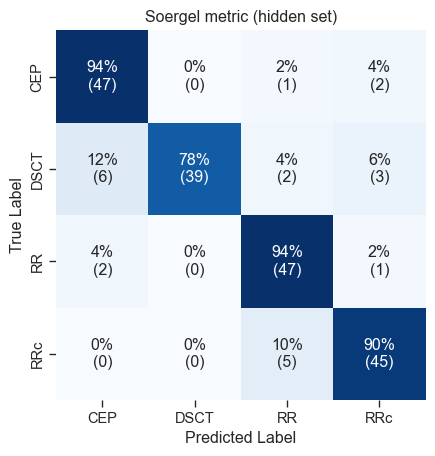

********** Run 9 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.58 %


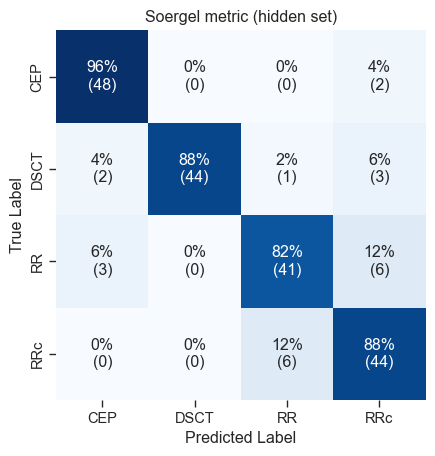

********** Run 10 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 87.53 %


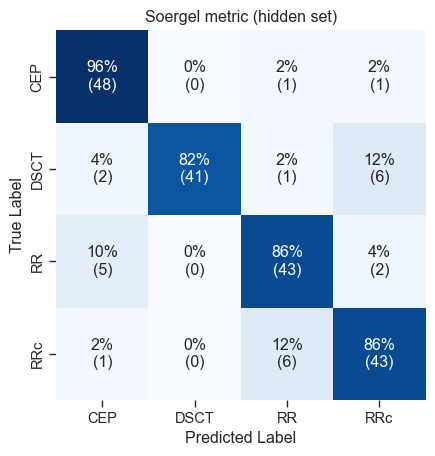

******************** Wave_Hedges ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 92.45 %


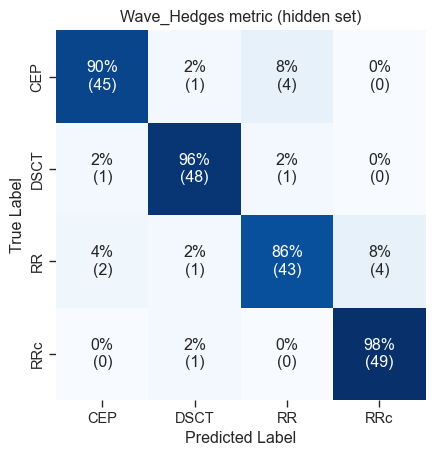

********** Run 2 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 89.61 %


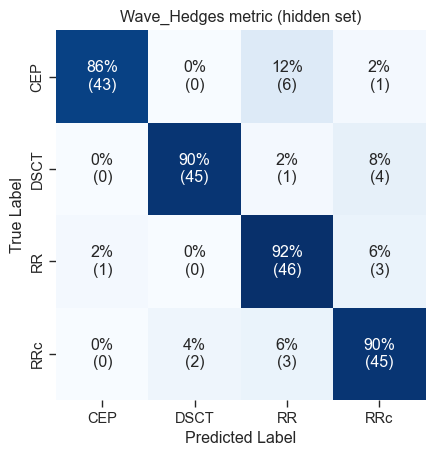

********** Run 3 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 92.01 %


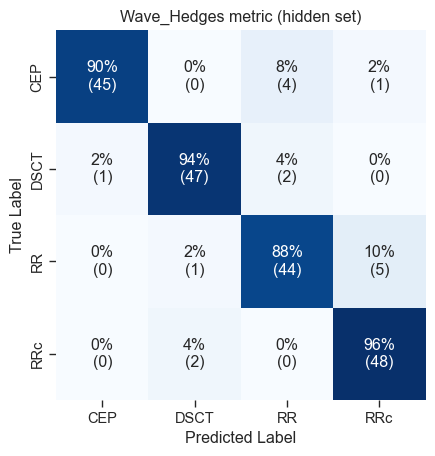

********** Run 4 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 92.04 %


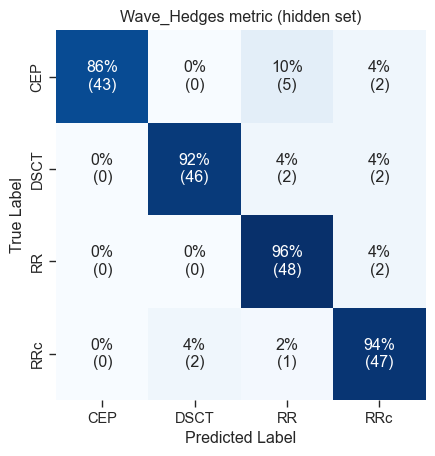

********** Run 5 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 91.94 %


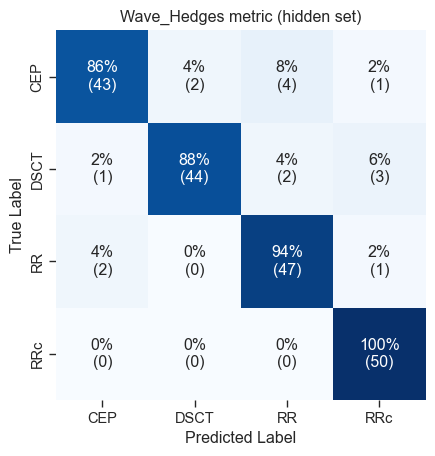

********** Run 6 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 89.07 %


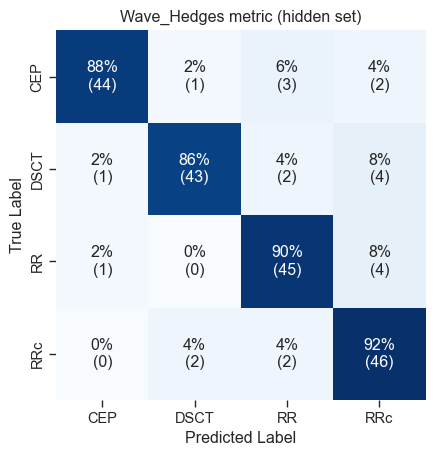

********** Run 7 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 85.56 %


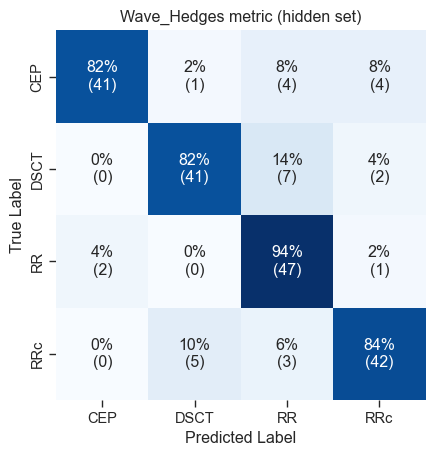

********** Run 8 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.01 %


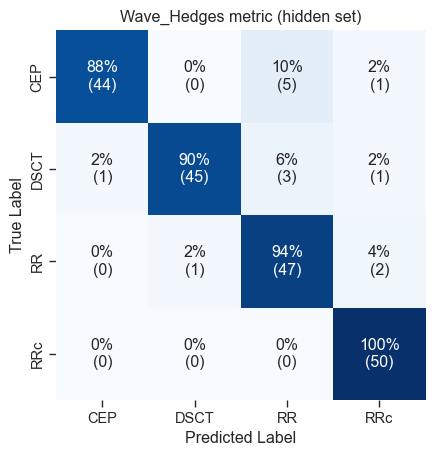

********** Run 9 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 92.49 %


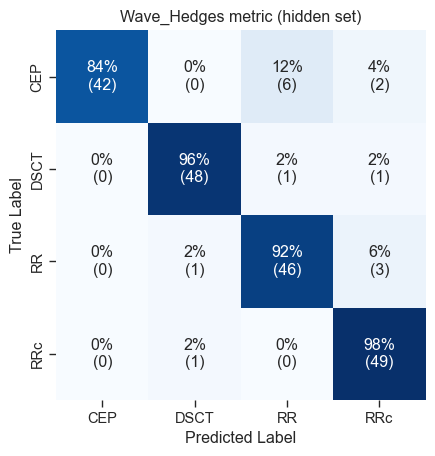

********** Run 10 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 91.07 %


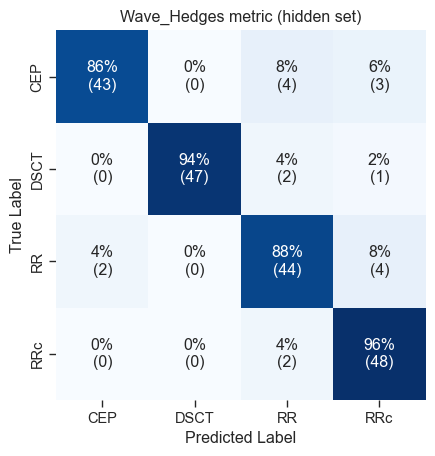

******************** Kulczynski ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 84.90 %


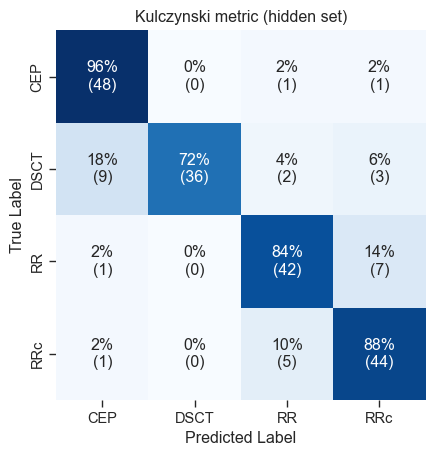

********** Run 2 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 92.58 %


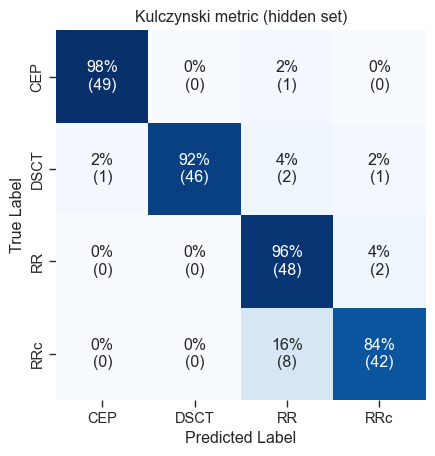

********** Run 3 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 86.84 %


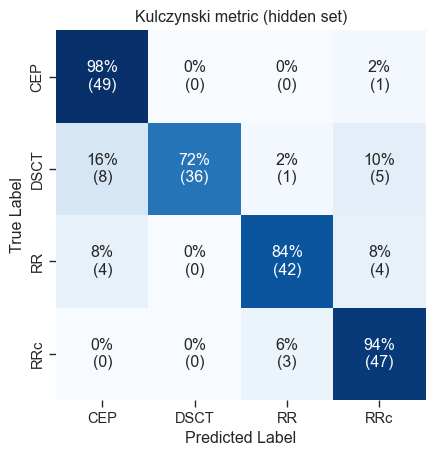

********** Run 4 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 89.99 %


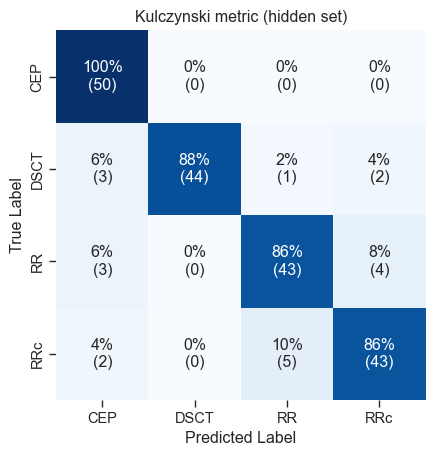

********** Run 5 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 89.86 %


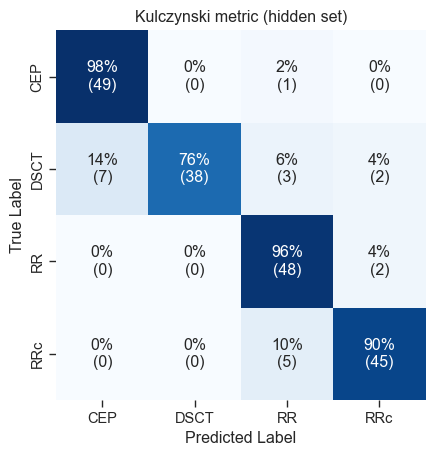

********** Run 6 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.43 %


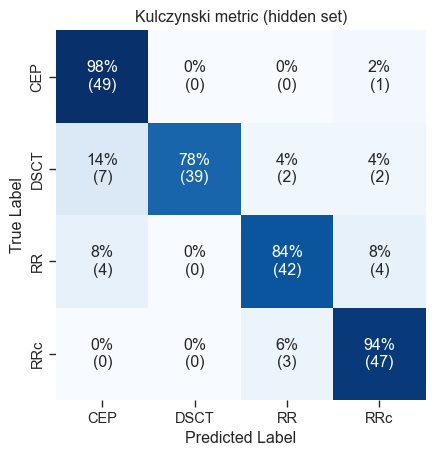

********** Run 7 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 92.03 %


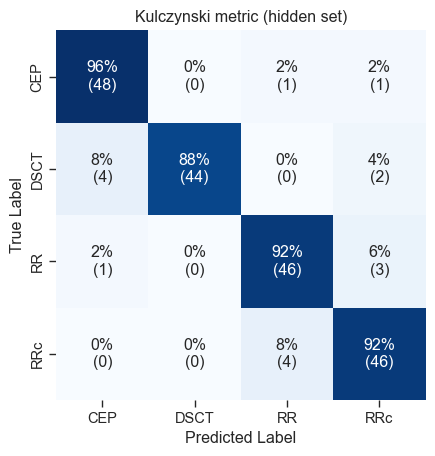

********** Run 8 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 90.03 %


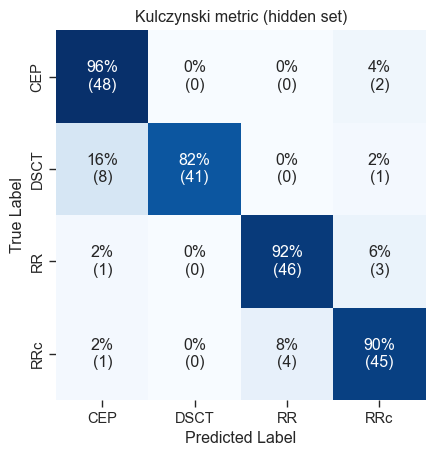

********** Run 9 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 87.49 %


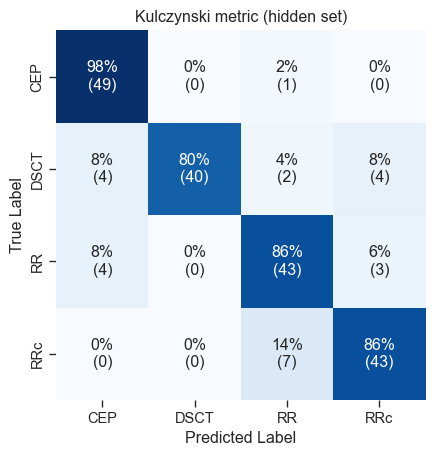

********** Run 10 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 91.46 %


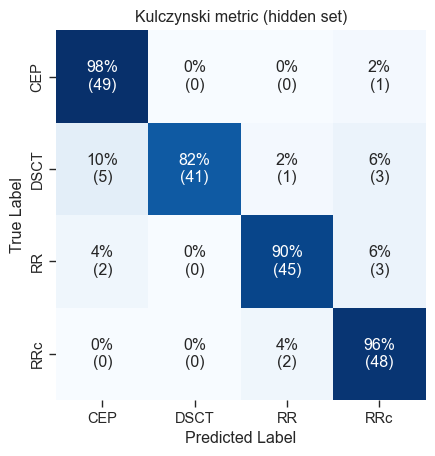

******************** Add_Chisq ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 91.58 %


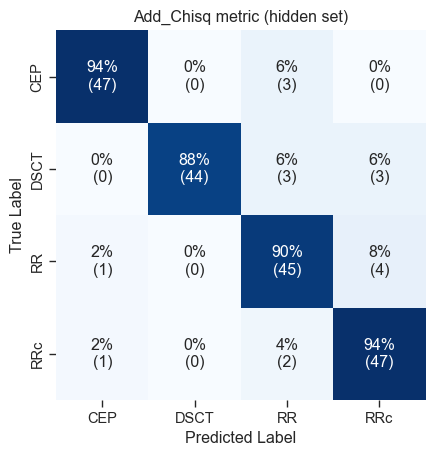

********** Run 2 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 93.04 %


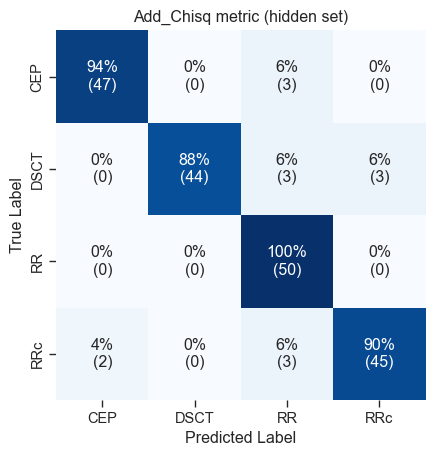

********** Run 3 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 90.60 %


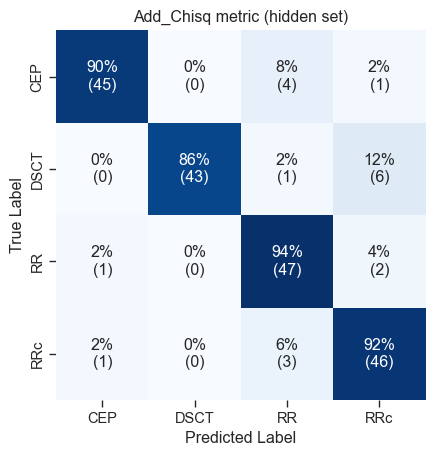

********** Run 4 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 92.89 %


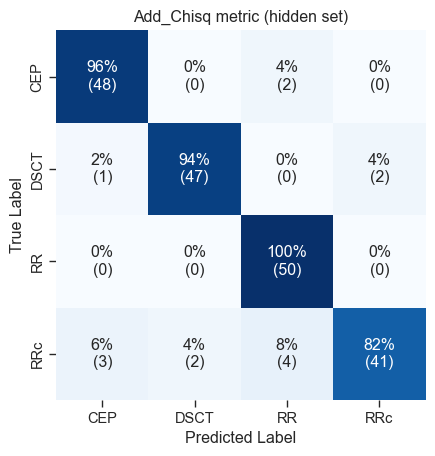

********** Run 5 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 90.61 %


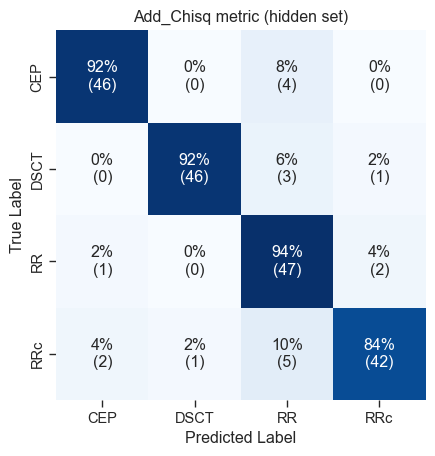

********** Run 6 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 93.51 %


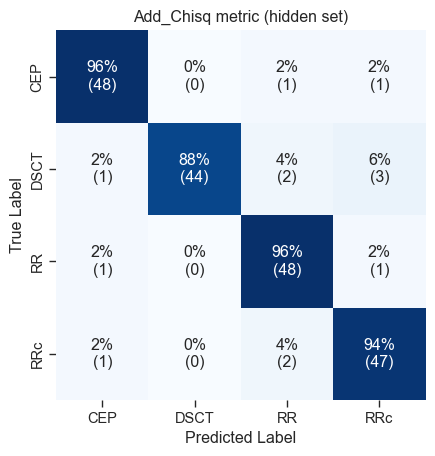

********** Run 7 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 92.08 %


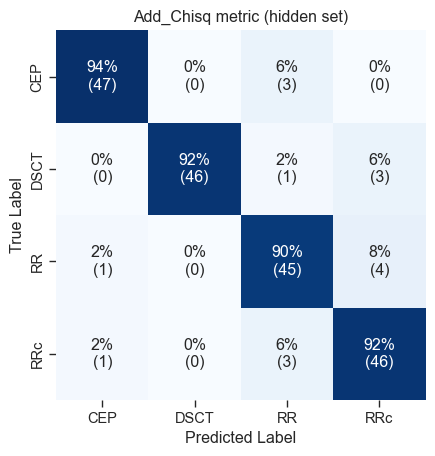

********** Run 8 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 93.05 %


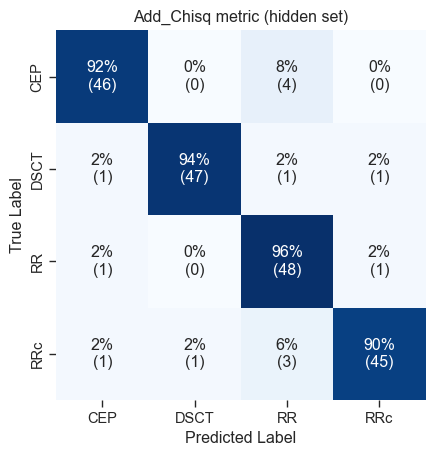

********** Run 9 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 93.05 %


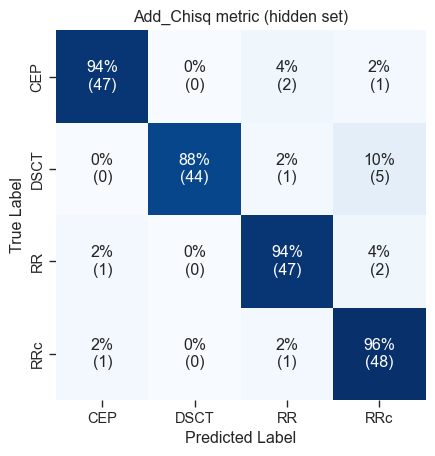

********** Run 10 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 92.05 %


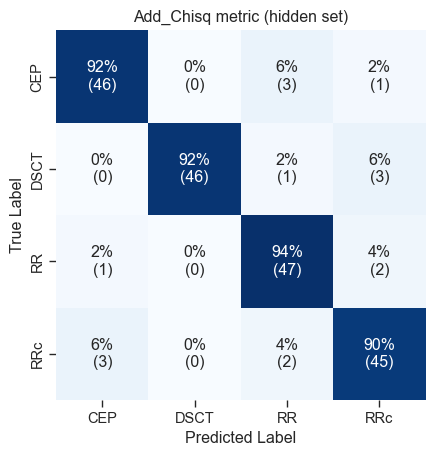

In [8]:
results_dict = {}
for metric in tqdm(all_metrics, desc="Metric", leave=True):
    metric_str = utils.get_metric_name(metric)
    locpath = os.path.join("results", results_subfolder, "distclassipy", metric_str)
    print("*" * 20, metric_str, "*" * 20)

    sfs_df = pd.read_csv(os.path.join(locpath, "sfs_allfeatures.csv"), index_col=0)
    feats_idx, feats = utils.load_best_features(sfs_df)

    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric, scale_std=True, calculate_kde=False, calculate_1d_dist=False
    )

    X_df = X_df_FULL.loc[y_df.index]

    X_df = X_df.loc[:, feats]

    X = X_df.to_numpy()
    y = y_df.to_numpy().ravel()

    lcdc.fit(X, y)

    HIDDENy_df = pd.read_csv("data/HIDDENy_df_multiclass.csv", index_col=0)
    HIDDENX_df = pd.read_csv("data/HIDDENX_df_multiclass.csv", index_col=0)

    HIDDENX_df = HIDDENX_df.loc[:, feats]
    HIDDENX_df = HIDDENX_df.dropna()
    HIDDENy_df = HIDDENy_df.loc[HIDDENX_df.index]

    # HIDDENX = HIDDENX_df.to_numpy()
    # HIDDENy = HIDDENy_df.to_numpy().ravel()

    results_dict[metric_str] = {}
    choose_objs = 50

    for run_num in tqdm(range(1, 11), desc="Run Number", leave=False):

        print("*" * 10, f"Run {run_num}", "*" * 10)

        #### NEW - choose 100 from each class
        cury_df = HIDDENy_df.groupby("class").sample(n=choose_objs).sample(frac=1) # Last sample for shuffling
        curX_df = HIDDENX_df.loc[cury_df.index]
        curX = curX_df.to_numpy()
        cury = cury_df.to_numpy().ravel()
        assert curX.shape[0]==cury.shape[0]
        
        results_dict[metric_str][run_num] = {}

        cury_pred = lcdc.predict_and_analyse(curX)
        
        acc = accuracy_score(y_true=cury, y_pred=cury_pred)
        f1score = f1_score(y_true=cury, y_pred=cury_pred, average="macro")
        matthew_coef = matthews_corrcoef(y_true=cury, y_pred=cury_pred)


        results_dict[metric_str][run_num]["acc"] = acc
        results_dict[metric_str][run_num]["f1score"] = f1score
        results_dict[metric_str][run_num]["matthew_coef"] = matthew_coef
        results_dict[metric_str][run_num]["features"] = feats
        results_dict[metric_str][run_num]["choose_objs"] = choose_objs

    
        print("\tExpected Score from training:")
        print(
            f"\t\tF1 = {sfs_df.loc[len(feats)]['avg_score']*100:.2f} ± {sfs_df.loc[len(feats)]['std_dev']*100:.2f}%"
        )
        print("\tActual score on hidden set:")
        # print(f"\tAcc = {100*acc:.2f} %")
        print(f"\t\tF1 = {100*f1score:.2f} %")
    
        ax = utils.plot_cm(y_true=cury, y_pred=cury_pred)
        plt.title(f"{metric_str.title()} metric (hidden set)")
        plt.savefig(os.path.join(locpath, "hidden_cm.pdf"), bbox_inches="tight")
        # plt.savefig(f"hidden_cm/{metric_str}.pdf",bbox_inches = 'tight')
        plt.show()

In [9]:
# Flatten the dictionary
data = []
for method, values in results_dict.items():
    for key, val in values.items():
        val['metric'] = method
        val['run'] = key
        data.append(val)

# Convert to DataFrame
df = pd.DataFrame(data)
df = df.loc[:,['metric', 'run', 'f1score', 'acc', 'features', 'matthew_coef', 'choose_objs']]

In [10]:
print("Mean")
df.drop(["run"],axis=1).groupby("metric").mean(numeric_only=True)

Mean


f1score     acc  matthew_coef  choose_objs
metric                                                     
Add_Chisq       0.922464  0.9220      0.897087         50.0
Braycurtis      0.889071  0.8890      0.854245         50.0
Canberra        0.937386  0.9370      0.916985         50.0
Chebyshev       0.783573  0.7825      0.720655         50.0
Cityblock       0.858135  0.8545      0.816868         50.0
Clark           0.929509  0.9290      0.905872         50.0
Correlation     0.731319  0.7320      0.651889         50.0
Cosine          0.766961  0.7645      0.698412         50.0
Euclidean       0.792795  0.7905      0.736870         50.0
Hellinger       0.932770  0.9325      0.910924         50.0
Jaccard         0.962162  0.9620      0.949979         50.0
Kulczynski      0.893603  0.8940      0.861342         50.0
Lorentzian      0.860636  0.8580      0.819803         50.0
Marylandbridge  0.641334  0.6405      0.521805         50.0
Meehl           0.722897  0.7165      0.642589         50.0
Motyka          0.888356  0.8885      0.853585         50.0
Soergel         0.886487  0.8865      0.850696         50.0
Wave_Hedges     0.909257  0.9090      0.879841         50.0

In [11]:
print("Mean")
df.drop(["run"],axis=1).groupby("metric").mean(numeric_only=True)

Mean


f1score     acc  matthew_coef  choose_objs
metric                                                     
Add_Chisq       0.922464  0.9220      0.897087         50.0
Braycurtis      0.889071  0.8890      0.854245         50.0
Canberra        0.937386  0.9370      0.916985         50.0
Chebyshev       0.783573  0.7825      0.720655         50.0
Cityblock       0.858135  0.8545      0.816868         50.0
Clark           0.929509  0.9290      0.905872         50.0
Correlation     0.731319  0.7320      0.651889         50.0
Cosine          0.766961  0.7645      0.698412         50.0
Euclidean       0.792795  0.7905      0.736870         50.0
Hellinger       0.932770  0.9325      0.910924         50.0
Jaccard         0.962162  0.9620      0.949979         50.0
Kulczynski      0.893603  0.8940      0.861342         50.0
Lorentzian      0.860636  0.8580      0.819803         50.0
Marylandbridge  0.641334  0.6405      0.521805         50.0
Meehl           0.722897  0.7165      0.642589         50.0
Motyka          0.888356  0.8885      0.853585         50.0
Soergel         0.886487  0.8865      0.850696         50.0
Wave_Hedges     0.909257  0.9090      0.879841         50.0

In [12]:
print("Std deviation")
df.drop(["run"],axis=1).groupby("metric").std(numeric_only=True)

Std deviation


f1score       acc  matthew_coef  choose_objs
metric                                                       
Add_Chisq       0.010447  0.010853      0.014345          0.0
Braycurtis      0.022861  0.022828      0.029535          0.0
Canberra        0.009355  0.009487      0.012412          0.0
Chebyshev       0.028867  0.028211      0.034841          0.0
Cityblock       0.022229  0.022663      0.027450          0.0
Clark           0.009058  0.009068      0.011890          0.0
Correlation     0.028046  0.029078      0.038643          0.0
Cosine          0.015178  0.014615      0.018711          0.0
Euclidean       0.016893  0.016741      0.021719          0.0
Hellinger       0.016590  0.016541      0.022083          0.0
Jaccard         0.007759  0.007888      0.010415          0.0
Kulczynski      0.024396  0.023898      0.030873          0.0
Lorentzian      0.027161  0.027608      0.034196          0.0
Marylandbridge  0.027305  0.026921      0.036083          0.0
Meehl           0.024708  0.023694      0.033351          0.0
Motyka          0.023861  0.023927      0.031287          0.0
Soergel         0.022817  0.022858      0.029906          0.0
Wave_Hedges     0.022747  0.023070      0.030370          0.0

In [13]:
df.drop(["run"],axis=1).groupby("metric").describe().loc[:,[
    ('f1score', 'count'),
    ('f1score',  'mean'),
    ('f1score',   'std'),
    ('choose_objs', 'mean')
    
    # ('f1score',   'min'),
    # ('f1score',   '25%'),
    # ('f1score',   '50%'),
    # ('f1score',   '75%'),
    # ('f1score',   'max'),
    # ('selected_feats', 'count'),
    # ('selected_feats',  'mean'),
    # ('selected_feats',   'std'),
    # ('selected_feats',   'min'),
    # ('selected_feats',   '25%'),
    # ('selected_feats',   '50%'),
    # ('selected_feats',   '75%'),
    # ('selected_feats',   'max'),

]].round(3)

f1score               choose_objs
                 count   mean    std        mean
metric                                          
Add_Chisq         10.0  0.922  0.010        50.0
Braycurtis        10.0  0.889  0.023        50.0
Canberra          10.0  0.937  0.009        50.0
Chebyshev         10.0  0.784  0.029        50.0
Cityblock         10.0  0.858  0.022        50.0
Clark             10.0  0.930  0.009        50.0
Correlation       10.0  0.731  0.028        50.0
Cosine            10.0  0.767  0.015        50.0
Euclidean         10.0  0.793  0.017        50.0
Hellinger         10.0  0.933  0.017        50.0
Jaccard           10.0  0.962  0.008        50.0
Kulczynski        10.0  0.894  0.024        50.0
Lorentzian        10.0  0.861  0.027        50.0
Marylandbridge    10.0  0.641  0.027        50.0
Meehl             10.0  0.723  0.025        50.0
Motyka            10.0  0.888  0.024        50.0
Soergel           10.0  0.886  0.023        50.0
Wave_Hedges       10.0  0.909  0.023        50.0